In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [ ]:
data=pd.read_csv('/content/Sales_Package_y_recycling_type_32136-0011.csv',encoding='unicode_escape')
data

Year               State  mixed packaging  \
0    2010   Baden-Württemberg            291.2   
1    2010              bayern            245.8   
2    2010              Berlin             77.8   
3    2010         Brandenburg             97.2   
4    2010              Bremen             23.8   
..    ...                 ...              ...   
171  2020            Saarland             34.5   
172  2020             Sachsen            163.3   
173  2020      Sachsen-Anhalt             98.8   
174  2020  Schleswig-Holstein            103.9   
175  2020           Thuringia             84.5   

    Packaging made of paper, cardboard, cardboard Mixed glass (mixed glass)  \
0                                           166.6                      40.8   
1                                           186.1                      19.3   
2                                            50.3                      19.9   
3                                            41.5                       3.8   
4                                            12.9                       8.5   
..                                            ...                       ...   
171                                          23.4                         x   
172                                          71.7                         x   
173                                          43.2                         x   
174                                             x                      34.4   
175                                          39.1                         x   

     Color separated glass Getrent Collected Plastics  \
0                    224.3                       17.9   
1                    293.9                       26.9   
2                     51.6                        6.1   
3                     60.7                        1.9   
4                      6.6                        1.9   
..                     ...                        ...   
171                   29.1                          0   
172                  108.0                          x   
173                   56.0                          x   
174                   47.7                          x   
175                   56.3                          x   

    Getrent collected metals Getrennt collecte verbunde  Overall  
0                        4.7                        1.3    746.9  
1                       25.8                        2.3    800.1  
2                        1.6                        0.8    208.1  
3                        0.3                        0.1    205.6  
4                        1.1                        0.1     55.1  
..                       ...                        ...      ...  
171                        x                          x     87.0  
172                        x                          x    343.0  
173                        x                          x    198.0  
174                        x                          x    248.6  
175                        x                          x    180.0  

[176 rows x 10 columns]

## Data Preprocessing

In [ ]:
# Renaming columns still in German
data.rename(columns={'Getrent Collected Plastics': 'Separated Collected Plastics',
                     'Getrent collected metals':'Separated collected metals',
                     'Getrennt collecte verbunde':'Composites collected separately',
                     'Packaging made of paper, cardboard, cardboard':'Packaging made of paper, cardboard'
                    }, inplace=True)
data

Year               State  mixed packaging  \
0    2010   Baden-Württemberg            291.2   
1    2010              bayern            245.8   
2    2010              Berlin             77.8   
3    2010         Brandenburg             97.2   
4    2010              Bremen             23.8   
..    ...                 ...              ...   
171  2020            Saarland             34.5   
172  2020             Sachsen            163.3   
173  2020      Sachsen-Anhalt             98.8   
174  2020  Schleswig-Holstein            103.9   
175  2020           Thuringia             84.5   

    Packaging made of paper, cardboard Mixed glass (mixed glass)  \
0                                166.6                      40.8   
1                                186.1                      19.3   
2                                 50.3                      19.9   
3                                 41.5                       3.8   
4                                 12.9                       8.5   
..                                 ...                       ...   
171                               23.4                         x   
172                               71.7                         x   
173                               43.2                         x   
174                                  x                      34.4   
175                               39.1                         x   

     Color separated glass Separated Collected Plastics  \
0                    224.3                         17.9   
1                    293.9                         26.9   
2                     51.6                          6.1   
3                     60.7                          1.9   
4                      6.6                          1.9   
..                     ...                          ...   
171                   29.1                            0   
172                  108.0                            x   
173                   56.0                            x   
174                   47.7                            x   
175                   56.3                            x   

    Separated collected metals Composites collected separately  Overall  
0                          4.7                             1.3    746.9  
1                         25.8                             2.3    800.1  
2                          1.6                             0.8    208.1  
3                          0.3                             0.1    205.6  
4                          1.1                             0.1     55.1  
..                         ...                             ...      ...  
171                          x                               x     87.0  
172                          x                               x    343.0  
173                          x                               x    198.0  
174                          x                               x    248.6  
175                          x                               x    180.0  

[176 rows x 10 columns]



---



In [ ]:
data.columns

Index(['Year', 'State', 'mixed packaging',
       'Packaging made of paper, cardboard', 'Mixed glass (mixed glass)',
       'Color separated glass', 'Separated Collected Plastics',
       'Separated collected metals', 'Composites collected separately',
       'Overall'],
      dtype='object')

In [ ]:
#States of Germany
print(data['State'].unique())

['Baden-Württemberg' 'bayern' 'Berlin' 'Brandenburg' 'Bremen' 'Hamburg'
 'Hessen' 'Mecklenburg-Vorpommern' 'Niedersachsen' 'North Rhine-Westfalen'
 'Rhineland-Pfalz' 'Saarland' 'Sachsen' 'Sachsen-Anhalt'
 'Schleswig-Holstein' 'Thuringia']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                176 non-null    int64  
 1   State                               176 non-null    object 
 2   mixed packaging                     176 non-null    float64
 3   Packaging made of paper, cardboard  176 non-null    object 
 4   Mixed glass (mixed glass)           176 non-null    object 
 5   Color separated glass               176 non-null    float64
 6   Separated Collected Plastics        176 non-null    object 
 7   Separated collected metals          176 non-null    object 
 8   Composites collected separately     176 non-null    object 
 9   Overall                             176 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 13.9+ KB


 **🔑 The columns which should give numeric values have a dtype 'object, but ideally it should be int or float**

In [ ]:
data.iloc[172][:]

Year                                     2020
State                                 Sachsen
mixed packaging                         163.3
Packaging made of paper, cardboard       71.7
Mixed glass (mixed glass)                   x
Color separated glass                   108.0
Separated Collected Plastics                x
Separated collected metals                  x
Composites collected separately             x
Overall                                 343.0
Name: 172, dtype: object



---



In [ ]:
#Counting the value 'x' in each column of Sales package return
value_to_count = 'x'
value_counts={}
for column in data.columns:
    count = data[column].eq(value_to_count).sum()
    value_counts[column] = count

for column, count in value_counts.items():
    print(f'{column} : {count}')

Year : 0
State : 0
mixed packaging : 0
Packaging made of paper, cardboard : 3
Mixed glass (mixed glass) : 44
Color separated glass : 0
Separated Collected Plastics : 18
Separated collected metals : 64
Composites collected separately : 70
Overall : 0


**🔑 Some values that were not available in the original German dataset were put up as 'x'**



---



In [ ]:
#Changing the value of x to 0.0
for column in data.columns:
    data[column]=data[column].apply(lambda x:0.0 if x=='x' else x )
data

Year               State  mixed packaging  \
0    2010   Baden-Württemberg            291.2   
1    2010              bayern            245.8   
2    2010              Berlin             77.8   
3    2010         Brandenburg             97.2   
4    2010              Bremen             23.8   
..    ...                 ...              ...   
171  2020            Saarland             34.5   
172  2020             Sachsen            163.3   
173  2020      Sachsen-Anhalt             98.8   
174  2020  Schleswig-Holstein            103.9   
175  2020           Thuringia             84.5   

    Packaging made of paper, cardboard Mixed glass (mixed glass)  \
0                                166.6                      40.8   
1                                186.1                      19.3   
2                                 50.3                      19.9   
3                                 41.5                       3.8   
4                                 12.9                       8.5   
..                                 ...                       ...   
171                               23.4                       0.0   
172                               71.7                       0.0   
173                               43.2                       0.0   
174                                0.0                      34.4   
175                               39.1                       0.0   

     Color separated glass Separated Collected Plastics  \
0                    224.3                         17.9   
1                    293.9                         26.9   
2                     51.6                          6.1   
3                     60.7                          1.9   
4                      6.6                          1.9   
..                     ...                          ...   
171                   29.1                            0   
172                  108.0                          0.0   
173                   56.0                          0.0   
174                   47.7                          0.0   
175                   56.3                          0.0   

    Separated collected metals Composites collected separately  Overall  
0                          4.7                             1.3    746.9  
1                         25.8                             2.3    800.1  
2                          1.6                             0.8    208.1  
3                          0.3                             0.1    205.6  
4                          1.1                             0.1     55.1  
..                         ...                             ...      ...  
171                        0.0                             0.0     87.0  
172                        0.0                             0.0    343.0  
173                        0.0                             0.0    198.0  
174                        0.0                             0.0    248.6  
175                        0.0                             0.0    180.0  

[176 rows x 10 columns]

In [ ]:
# Rechecking whether we still have ' x ' in our dataset
value_to_count = 'x'
value_counts={}
for column in data.columns:
    count = data[column].eq(value_to_count).sum()
    value_counts[column] = count

for column, count in value_counts.items():
    print(f'{column} : {count}')

Year : 0
State : 0
mixed packaging : 0
Packaging made of paper, cardboard : 0
Mixed glass (mixed glass) : 0
Color separated glass : 0
Separated Collected Plastics : 0
Separated collected metals : 0
Composites collected separately : 0
Overall : 0


In [ ]:
object_columns = data.select_dtypes(include=['object']).columns.difference(['State'])
object_columns

Index(['Composites collected separately', 'Mixed glass (mixed glass)',
       'Packaging made of paper, cardboard', 'Separated Collected Plastics',
       'Separated collected metals'],
      dtype='object')

**🔑 Convert the data type of object columns to 'str' (change it to any desired type)**








---



In [ ]:
sum_overall=data[['mixed packaging','Packaging made of paper, cardboard',
                  'Mixed glass (mixed glass)',	'Color separated glass'	,'Separated Collected Plastics',	'Separated collected metals','Composites collected separately']].sum(axis=1)

data[sum_overall != data['Overall']]

<ipython-input-131-b00eeb88959f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sum_overall=data[['mixed packaging','Packaging made of paper, cardboard',


Year               State  mixed packaging  \
0    2010   Baden-Württemberg            291.2   
1    2010              bayern            245.8   
2    2010              Berlin             77.8   
3    2010         Brandenburg             97.2   
4    2010              Bremen             23.8   
..    ...                 ...              ...   
171  2020            Saarland             34.5   
172  2020             Sachsen            163.3   
173  2020      Sachsen-Anhalt             98.8   
174  2020  Schleswig-Holstein            103.9   
175  2020           Thuringia             84.5   

    Packaging made of paper, cardboard Mixed glass (mixed glass)  \
0                                166.6                      40.8   
1                                186.1                      19.3   
2                                 50.3                      19.9   
3                                 41.5                       3.8   
4                                 12.9                       8.5   
..                                 ...                       ...   
171                               23.4                       0.0   
172                               71.7                       0.0   
173                               43.2                       0.0   
174                                0.0                      34.4   
175                               39.1                       0.0   

     Color separated glass Separated Collected Plastics  \
0                    224.3                         17.9   
1                    293.9                         26.9   
2                     51.6                          6.1   
3                     60.7                          1.9   
4                      6.6                          1.9   
..                     ...                          ...   
171                   29.1                            0   
172                  108.0                          0.0   
173                   56.0                          0.0   
174                   47.7                          0.0   
175                   56.3                          0.0   

    Separated collected metals Composites collected separately  Overall  
0                          4.7                             1.3    746.9  
1                         25.8                             2.3    800.1  
2                          1.6                             0.8    208.1  
3                          0.3                             0.1    205.6  
4                          1.1                             0.1     55.1  
..                         ...                             ...      ...  
171                        0.0                             0.0     87.0  
172                        0.0                             0.0    343.0  
173                        0.0                             0.0    198.0  
174                        0.0                             0.0    248.6  
175                        0.0                             0.0    180.0  

[176 rows x 10 columns]

In [ ]:
condition = (sum_overall != data['Overall'])
update_count=0

# Update the overall column in those rows to be equal to sum_overall
data.loc[condition, 'Overall'] = sum_overall[condition]



---



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                176 non-null    int64  
 1   State                               176 non-null    object 
 2   mixed packaging                     176 non-null    float64
 3   Packaging made of paper, cardboard  176 non-null    object 
 4   Mixed glass (mixed glass)           176 non-null    object 
 5   Color separated glass               176 non-null    float64
 6   Separated Collected Plastics        176 non-null    object 
 7   Separated collected metals          176 non-null    object 
 8   Composites collected separately     176 non-null    object 
 9   Overall                             176 non-null    float64
dtypes: float64(3), int64(1), object(6)
memory usage: 13.9+ KB


In [ ]:
#Converting Sales Packaging returns column from 'object' to 'float'
convert_col=[column for column in data.columns if column not in ['Year','State']]
for col in convert_col:
  if data[col].dtype=='object':
    data[col] = data[col].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                176 non-null    int64  
 1   State                               176 non-null    object 
 2   mixed packaging                     176 non-null    float64
 3   Packaging made of paper, cardboard  176 non-null    float64
 4   Mixed glass (mixed glass)           176 non-null    float64
 5   Color separated glass               176 non-null    float64
 6   Separated Collected Plastics        176 non-null    float64
 7   Separated collected metals          176 non-null    float64
 8   Composites collected separately     176 non-null    float64
 9   Overall                             176 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 13.9+ KB




---



In [ ]:
data.describe(include='all')

Year              State  mixed packaging  \
count    176.0000                176       176.000000   
unique        NaN                 16              NaN   
top           NaN  Baden-Württemberg              NaN   
freq          NaN                 11              NaN   
mean    2015.0000                NaN       164.487500   
std        3.1713                NaN       146.279672   
min     2010.0000                NaN        23.000000   
25%     2012.0000                NaN        74.400000   
50%     2015.0000                NaN       101.400000   
75%     2018.0000                NaN       215.925000   
max     2020.0000                NaN       678.600000   

        Packaging made of paper, cardboard  Mixed glass (mixed glass)  \
count                           176.000000                 176.000000   
unique                                 NaN                        NaN   
top                                    NaN                        NaN   
freq                                   NaN                        NaN   
mean                             78.996023                  12.621591   
std                              76.658473                  14.411899   
min                               0.000000                   0.000000   
25%                              31.150000                   0.000000   
50%                              46.300000                   5.150000   
75%                             110.950000                  24.450000   
max                             327.200000                  56.700000   

        Color separated glass  Separated Collected Plastics  \
count              176.000000                    176.000000   
unique                    NaN                           NaN   
top                       NaN                           NaN   
freq                      NaN                           NaN   
mean               110.144318                      2.898295   
std                102.738604                      4.933610   
min                  5.200000                      0.000000   
25%                 42.075000                      0.200000   
50%                 60.650000                      0.700000   
75%                152.575000                      2.800000   
max                413.500000                     26.900000   

        Separated collected metals  Composites collected separately  \
count                   176.000000                       176.000000   
unique                         NaN                              NaN   
top                            NaN                              NaN   
freq                           NaN                              NaN   
mean                      1.701705                         0.256818   
std                       4.380913                         0.543175   
min                       0.000000                         0.000000   
25%                       0.000000                         0.000000   
50%                       0.100000                         0.000000   
75%                       0.900000                         0.200000   
max                      25.800000                         2.500000   

            Overall  
count    176.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean     274.631818  
std      245.138981  
min       28.700000  
25%      117.500000  
50%      158.100000  
75%      371.725000  
max     1048.800000

 **🔑 The maximum value of all columns is significantly larger than the 75th percentile suggesting errors and outliers.**

## Total Collection Yearwise

In [ ]:
groupby_year_wise=data.groupby(['Year']).agg({
    'mixed packaging': 'sum',
    'Packaging made of paper, cardboard': 'sum',
    'Mixed glass (mixed glass)': 'sum',
    'Color separated glass': 'sum',
    'Separated Collected Plastics': 'sum',
    'Separated collected metals': 'sum',
    'Composites collected separately': 'sum'
}).reset_index()

groupby_year_wise

Year  mixed packaging  Packaging made of paper, cardboard  \
0   2010           2445.2                              1193.5   
1   2011           2498.6                              1252.1   
2   2012           2711.5                              1208.3   
3   2013           2875.9                              1314.4   
4   2014           2909.5                              1307.8   
5   2015           2523.4                              1146.7   
6   2016           2569.0                              1152.4   
7   2017           2575.3                              1199.4   
8   2018           2515.6                              1294.3   
9   2019           2639.6                              1377.6   
10  2020           2686.2                              1456.8   

    Mixed glass (mixed glass)  Color separated glass  \
0                       263.0                 1722.8   
1                       245.7                 1785.7   
2                       245.1                 1755.2   
3                       250.7                 1836.1   
4                       253.0                 1792.3   
5                       164.8                 1716.7   
6                       164.9                 1715.1   
7                       156.2                 1719.1   
8                       154.8                 1664.3   
9                       160.4                 1734.5   
10                      162.8                 1943.6   

    Separated Collected Plastics  Separated collected metals  \
0                           92.8                        46.0   
1                           81.8                        43.3   
2                           86.4                        39.6   
3                           67.3                        32.7   
4                           72.0                        34.7   
5                           22.3                        20.2   
6                           23.3                        18.6   
7                           22.3                        18.1   
8                           21.3                        14.3   
9                            7.3                        16.5   
10                          13.3                        15.5   

    Composites collected separately  
0                               8.5  
1                               6.3  
2                               5.6  
3                               4.9  
4                               5.0  
5                               4.3  
6                               2.5  
7                               2.5  
8                               2.2  
9                               1.9  
10                              1.5

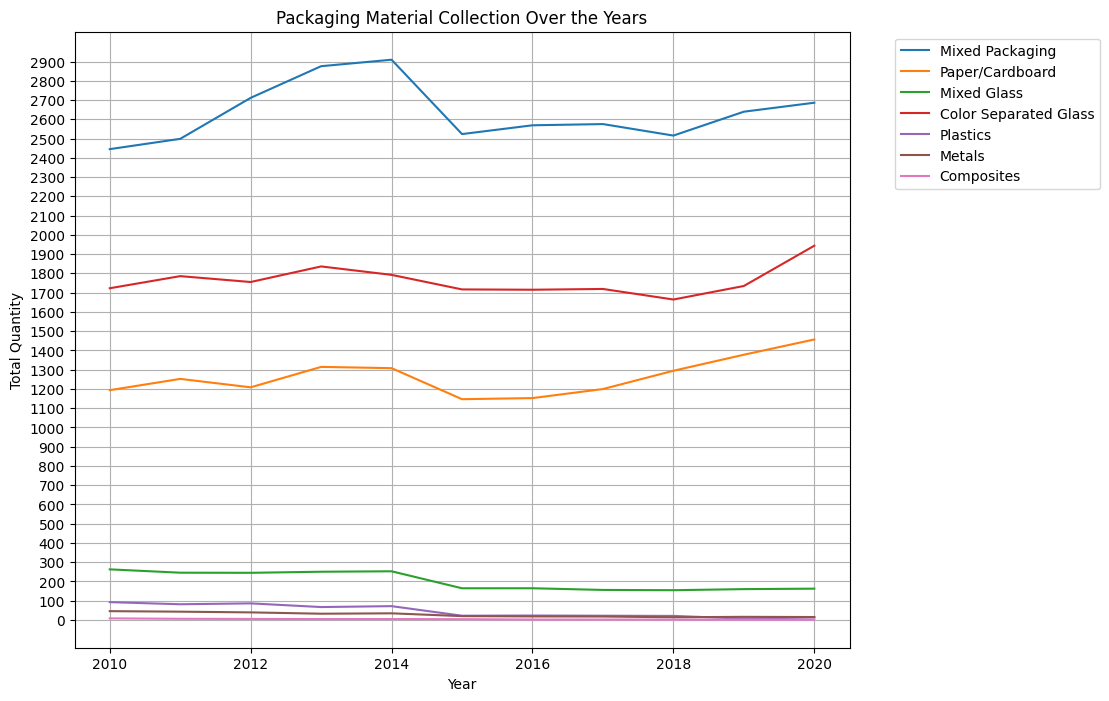

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(groupby_year_wise['Year'], groupby_year_wise['mixed packaging'], label='Mixed Packaging')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Packaging made of paper, cardboard'], label='Paper/Cardboard')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Mixed glass (mixed glass)'], label='Mixed Glass')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Color separated glass'], label='Color Separated Glass')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Separated Collected Plastics'], label='Plastics')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Separated collected metals'], label='Metals')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Composites collected separately'], label='Composites')

plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.title('Packaging Material Collection Over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.yticks(np.arange(0,3000, 100))

plt.show()

#### **Insights:-**
1. The above graph shows that the total mixed packaging return collection is highest over all the years which is also validated by the Sales Package Dataset '32131-0003'.

2. Seeing the trend in the past one decade, we can expect that the trend will be continuous in the future.

3. Every wastage type overall collection is showing a linear increase over the years but this increase had a fall for each sales package return type in the year 2015.

4. The highest collection of sales package return is Mixed Packaging followed by Color separated glass and then packaging made of Paper, Cardboard



---



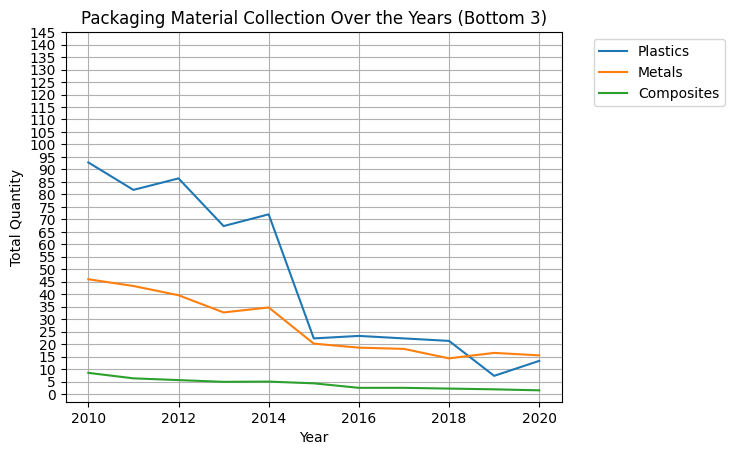

In [ ]:
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Separated Collected Plastics'], label='Plastics')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Separated collected metals'], label='Metals')
plt.plot(groupby_year_wise['Year'], groupby_year_wise['Composites collected separately'], label='Composites')

plt.xlabel('Year')
plt.ylabel('Total Quantity')
plt.title('Packaging Material Collection Over the Years (Bottom 3)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.yticks(np.arange(0,150, 5))

plt.show()

#### **Insights:-**
1. There needs to more focus on the collection of these three packaging materials: Seperately Collected Plastics, Separately Collected Metals, Composites Collected Separately.

2. Graphs show that plastic collection is decreasing notably over the years, even though the plastic packaging generation may not be decreasing.

3. According to the sales package dataset "32136-0003", Innovative Industry Solutions were responsible for majority of plastic packaging collection, but in this dataset we can see that Plastic Collection is decreasing notably. We can deduce insights that innovative industry solutions even though being responsible for majority of collection isn't collecting plastic as much as needed.

## Total Collection Statewise

In [ ]:
groupby_state_wise=data.groupby(['State']).agg({
    'mixed packaging': 'sum',
    'Packaging made of paper, cardboard': 'sum',
    'Mixed glass (mixed glass)': 'sum',
    'Color separated glass': 'sum',
    'Separated Collected Plastics': 'sum',
    'Separated collected metals': 'sum',
    'Composites collected separately': 'sum'
}).reset_index()

groupby_state_wise['Total'] = groupby_state_wise.sum(axis=1)
groupby_state_wise

<ipython-input-139-a5b9f79d9cbe>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  groupby_state_wise['Total'] = groupby_state_wise.sum(axis=1)


State  mixed packaging  \
0        Baden-Württemberg           3986.6   
1                   Berlin            901.3   
2              Brandenburg           1108.5   
3                   Bremen            275.0   
4                  Hamburg            402.6   
5                   Hessen           2130.9   
6   Mecklenburg-Vorpommern            766.6   
7            Niedersachsen           3025.0   
8    North Rhine-Westfalen           6557.9   
9          Rhineland-Pfalz           1582.0   
10                Saarland            372.6   
11                 Sachsen           1847.1   
12          Sachsen-Anhalt           1062.8   
13      Schleswig-Holstein           1125.6   
14               Thuringia            907.7   
15                  bayern           2897.6   

    Packaging made of paper, cardboard  Mixed glass (mixed glass)  \
0                               1909.5                      395.3   
1                                546.2                      250.2   
2                                432.9                       13.5   
3                                127.5                       75.9   
4                                306.2                        6.7   
5                               1009.3                       60.7   
6                                306.4                       23.9   
7                               1401.5                      378.0   
8                               3034.3                      287.8   
9                                642.7                      278.1   
10                               132.2                        2.1   
11                               584.7                       17.5   
12                               383.9                        9.1   
13                               448.5                      355.1   
14                               364.7                        8.2   
15                              2272.8                       59.3   

    Color separated glass  Separated Collected Plastics  \
0                  2573.3                         107.1   
1                   498.6                          20.7   
2                   701.5                          14.5   
3                    61.7                           7.0   
4                   332.5                           9.0   
5                  1518.1                          13.1   
6                   489.0                           6.3   
7                  1856.8                          37.2   
8                  3984.8                          71.2   
9                   943.6                          22.0   
10                  306.0                           2.1   
11                 1128.7                          15.9   
12                  596.1                          10.9   
13                  456.9                           7.9   
14                  593.3                           4.5   
15                 3344.5                         160.7   

    Separated collected metals  Composites collected separately    Total  
0                         42.8                             12.1   9026.7  
1                          5.8                              2.0   2224.8  
2                          3.6                              0.9   2275.4  
3                          3.0                              0.3    550.4  
4                          1.8                              0.2   1059.0  
5                          2.9                              0.6   4735.6  
6                          0.9                              0.2   1593.3  
7                          6.2                              1.2   6705.9  
8                         20.8                              5.0  13961.8  
9                          1.3                              0.6   3470.3  
10                         0.4                              0.0    815.4  
11                         6.9                              1.0   3601.8  
12                         4.1                              0.7   20

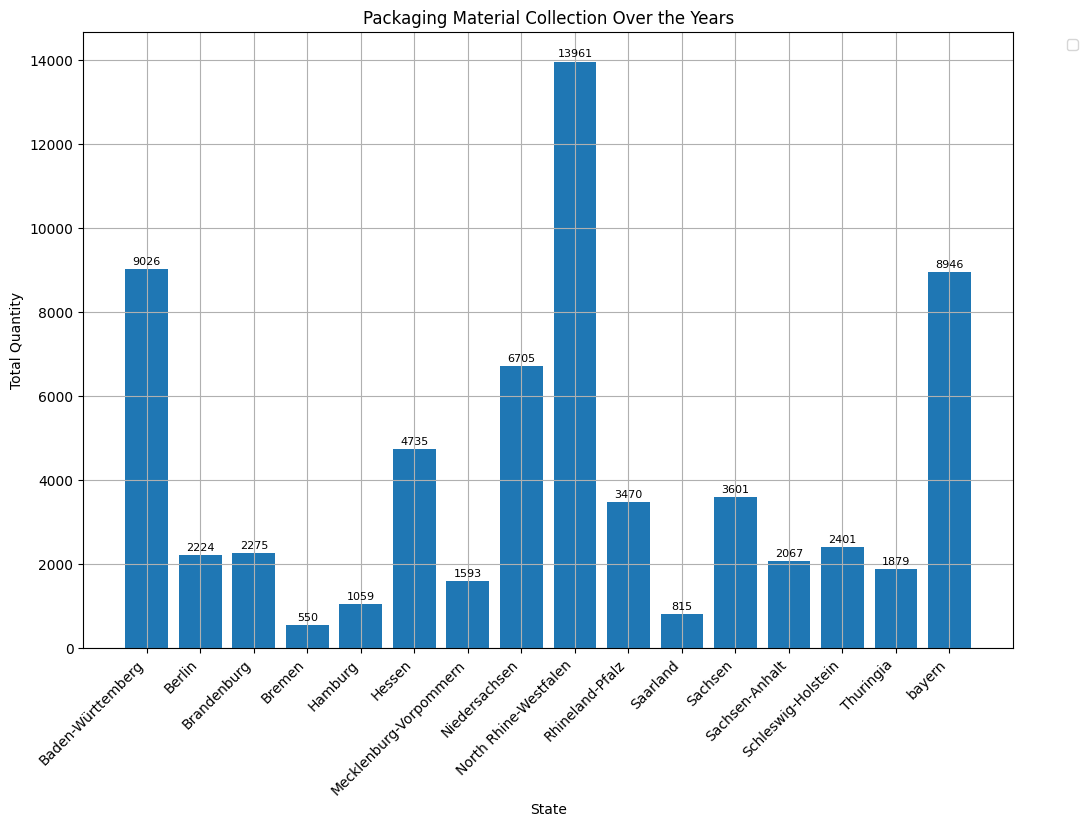

In [ ]:
plt.figure(figsize=(12, 8))
bars = plt.bar(groupby_state_wise['State'], groupby_state_wise['Total'])
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=8)


plt.xlabel('State')
plt.ylabel('Total Quantity')
plt.title('Packaging Material Collection Over the Years')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45, ha='right')
plt.show()

#### **Insights:-**
1. 'Bremen', 'Hamburg', 'Saarland' are the states with the lowest waste collection. They need more attention regarding waste collection through more innovative industry solutions and by sytem operators.

2. We need to check this overall collection with respect to waste generation by each state to gain more information and insights.

## Return of Sales Package in Each State

In [ ]:

def create_pie_chart(dataframe,column, years):
    num_colors = len(dataframe['State'].unique())
    custom_cmap = plt.get_cmap("tab20", num_colors)
    # Create subplots with 2 plots in one row
    num_rows = len(years) // 3 + (len(years) % 3 > 0)  # Calculate the number of rows needed
    fig, axes = plt.subplots(num_rows, 3, figsize=(18, 9* num_rows))

    for i, year in enumerate(years):
        # Filter the dataframe for the specified year
        year_df = dataframe[dataframe['Year'] == year]

        # Group the data by 'State' and calculate the sum of 'mixed packaging' for each state
        state_grouped = year_df.groupby('State')[column].sum().reset_index()

        # Determine the subplot location
        row = i // 3
        col = i % 3

        # Calculate percentages
        percentages = 100 * state_grouped[column] / state_grouped[column].sum()

        # Filter labels and percentages greater than or equal to 4%
        labels = [label if percent >= 4 else '' for label, percent in zip(state_grouped['State'], percentages)]
        sizes = [size for size, percent in zip(state_grouped[column], percentages)]


        # Create a pie chart on the specified subplot
        ax = axes[row, col]
        ax.pie(sizes, labels=[''] * len(labels),autopct='%1.1f%%',startangle=90,pctdistance=1.09 ,colors=custom_cmap(range(num_colors)))
        ax.set_title(f'{column} Share in {year}', y=0.9)  # Adjust the y position for the title
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Create a legend for the colors using unique 'State' values
    unique_states = dataframe['State'].unique()
    legend_labels = [state for state in unique_states]
    fig.legend(legend_labels, loc='upper left', bbox_to_anchor=(0.9, 0.9))

    # Adjust layout
    plt.tight_layout()

    for i in range(len(years), num_rows * 3):
        fig.delaxes(axes[i // 3, i % 3])

    plt.subplots_adjust(bottom=0.05, top=0.85, left=0.05, right=0.95)

    # Show the subplots
    plt.show()

### Collection of Sales Package Return in each state (Mixed Packaging)

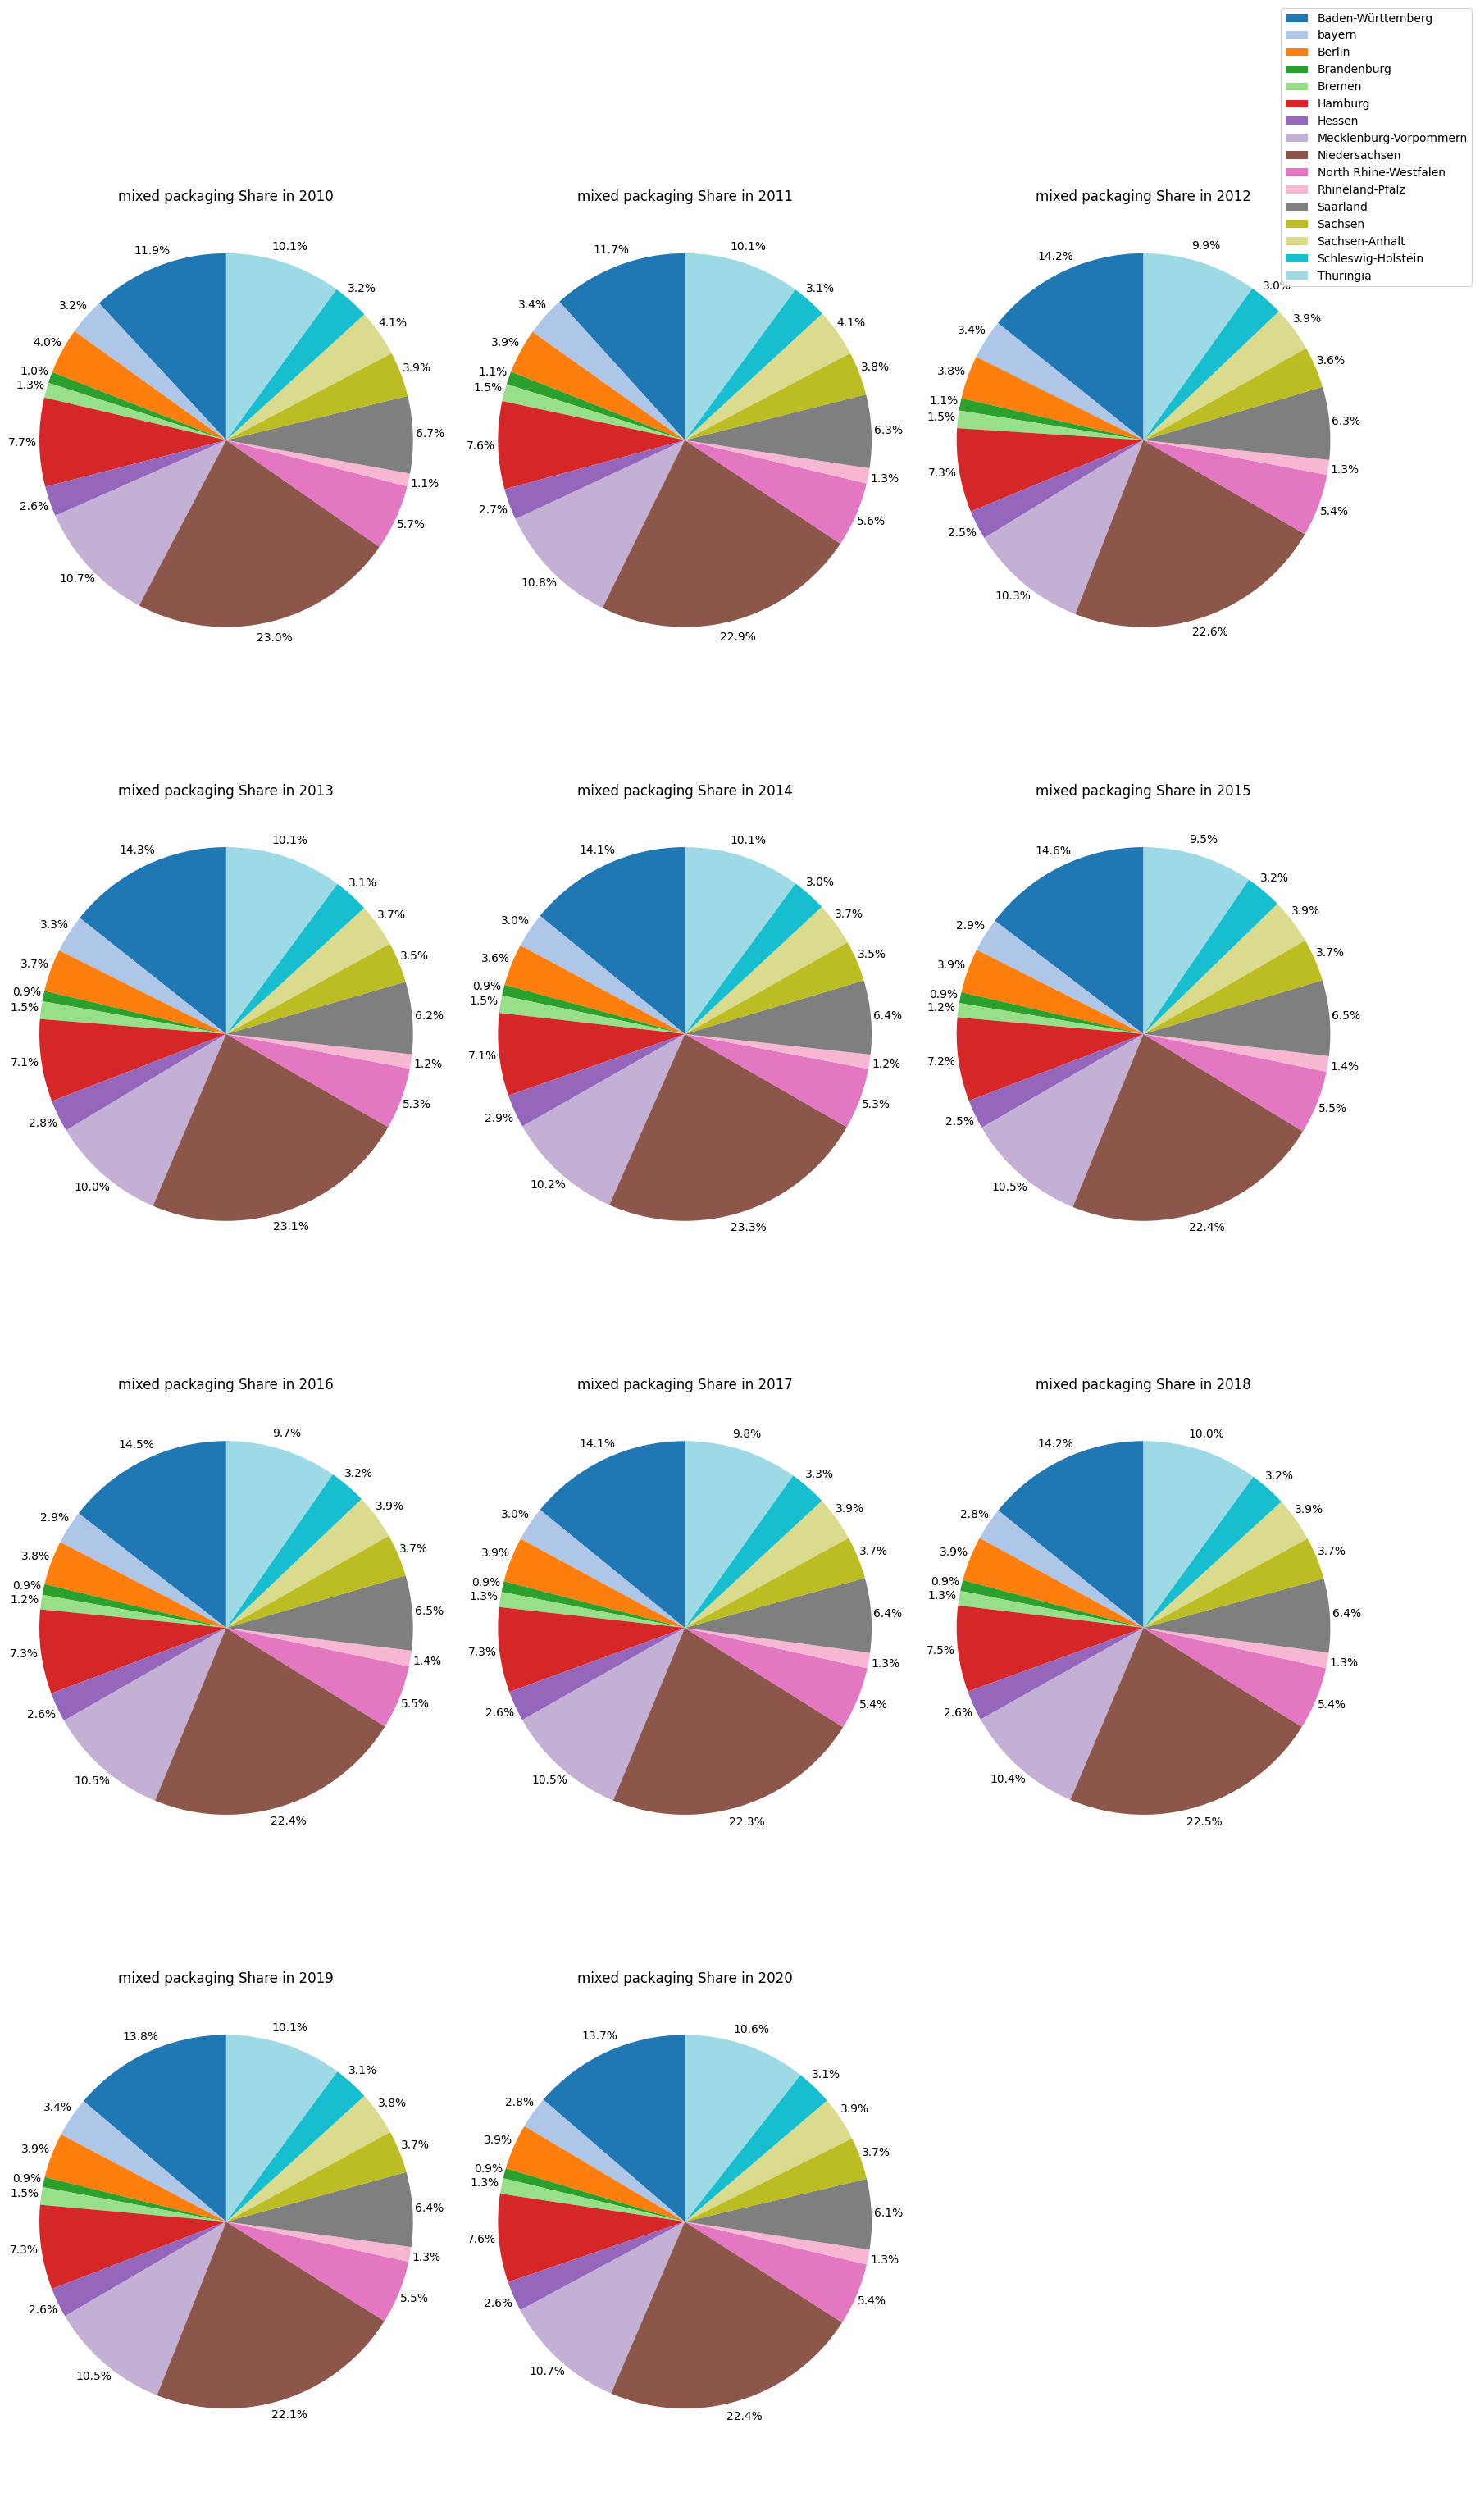

In [ ]:
create_pie_chart(data,'mixed packaging',data['Year'].unique())

#### **Insights:-**
1. Incase of mixed packaging, There has been consistent collection of waste return from all states over the years.
2. Neidersachsen , Baden-Wurttemberg, Mecklenburg-Vorpommern are responsible for the major chunk of Mixed packaging return over the years.

### Collection of Sales Package Return in each state (Packaging made of paper, cardboard, cardboard)

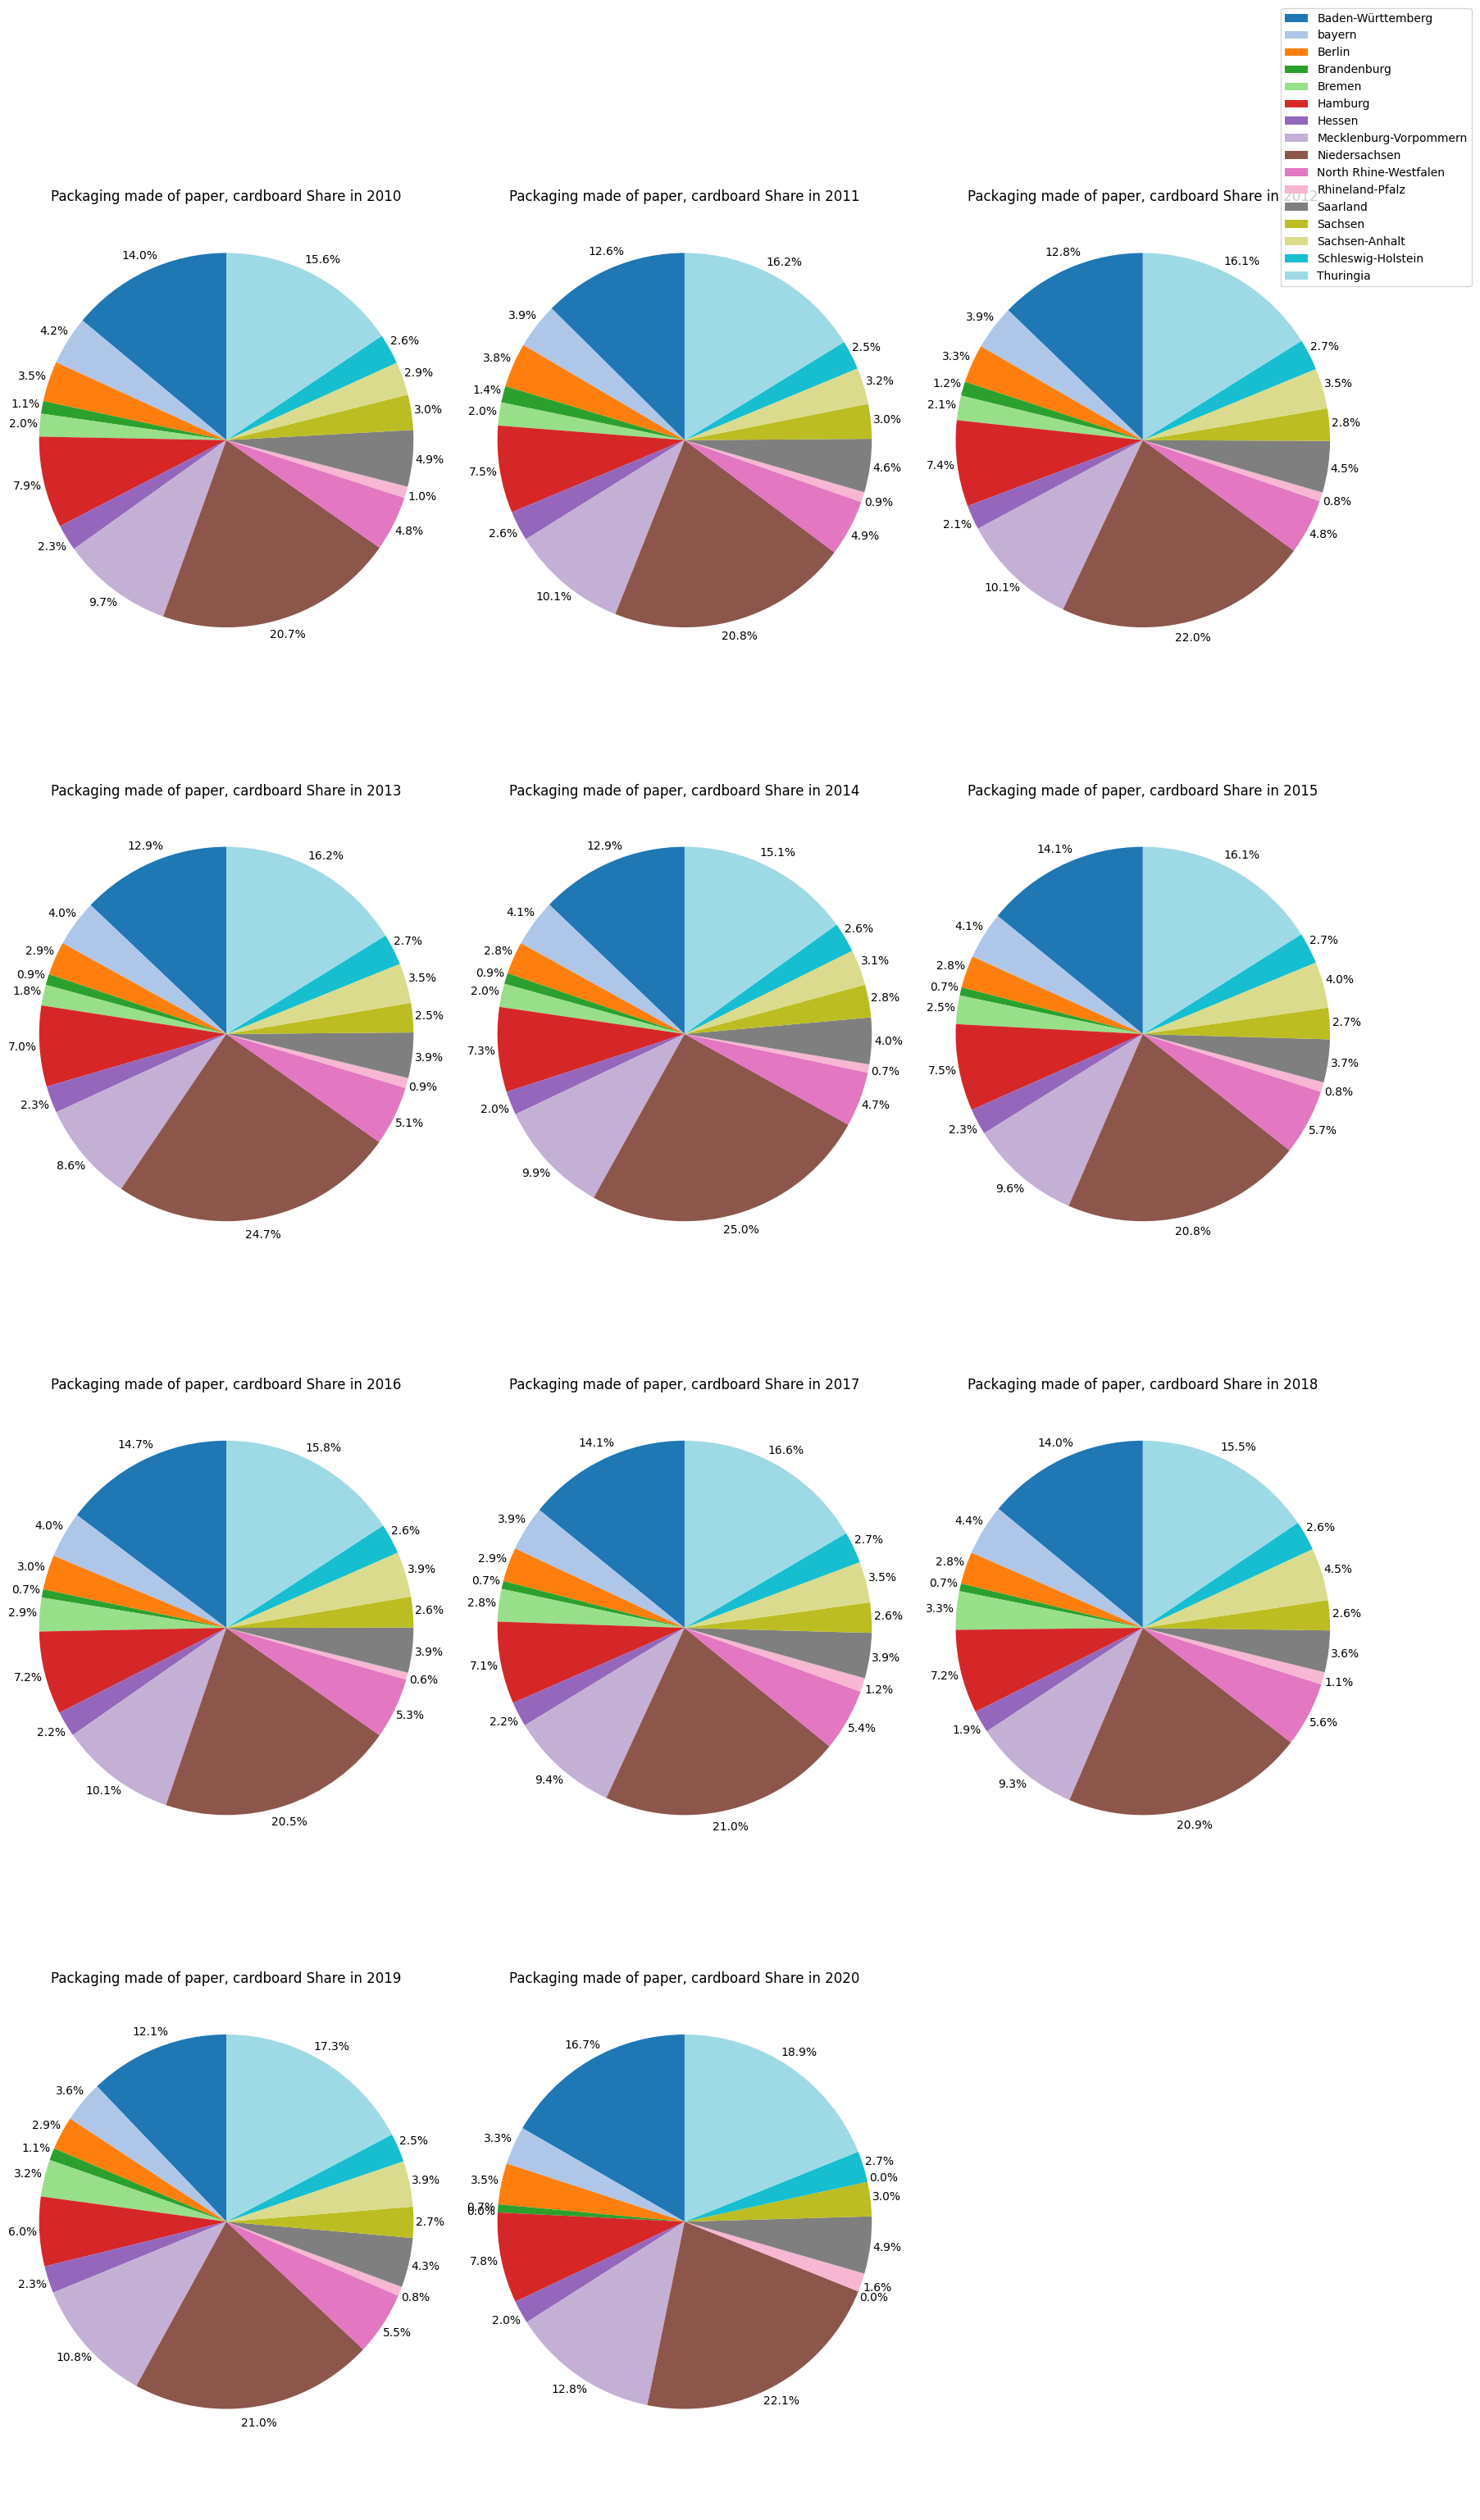

In [ ]:
create_pie_chart(data,'Packaging made of paper, cardboard',data['Year'].unique())

#### **Insights:-**
1. Neidersachsen , Baden-Wurttemberg, Thuringia are responsible for the major chunk of Mixed packaging return over the years.

### Collection of Sales Package Return in each state (Mixed glass (mixed glass))

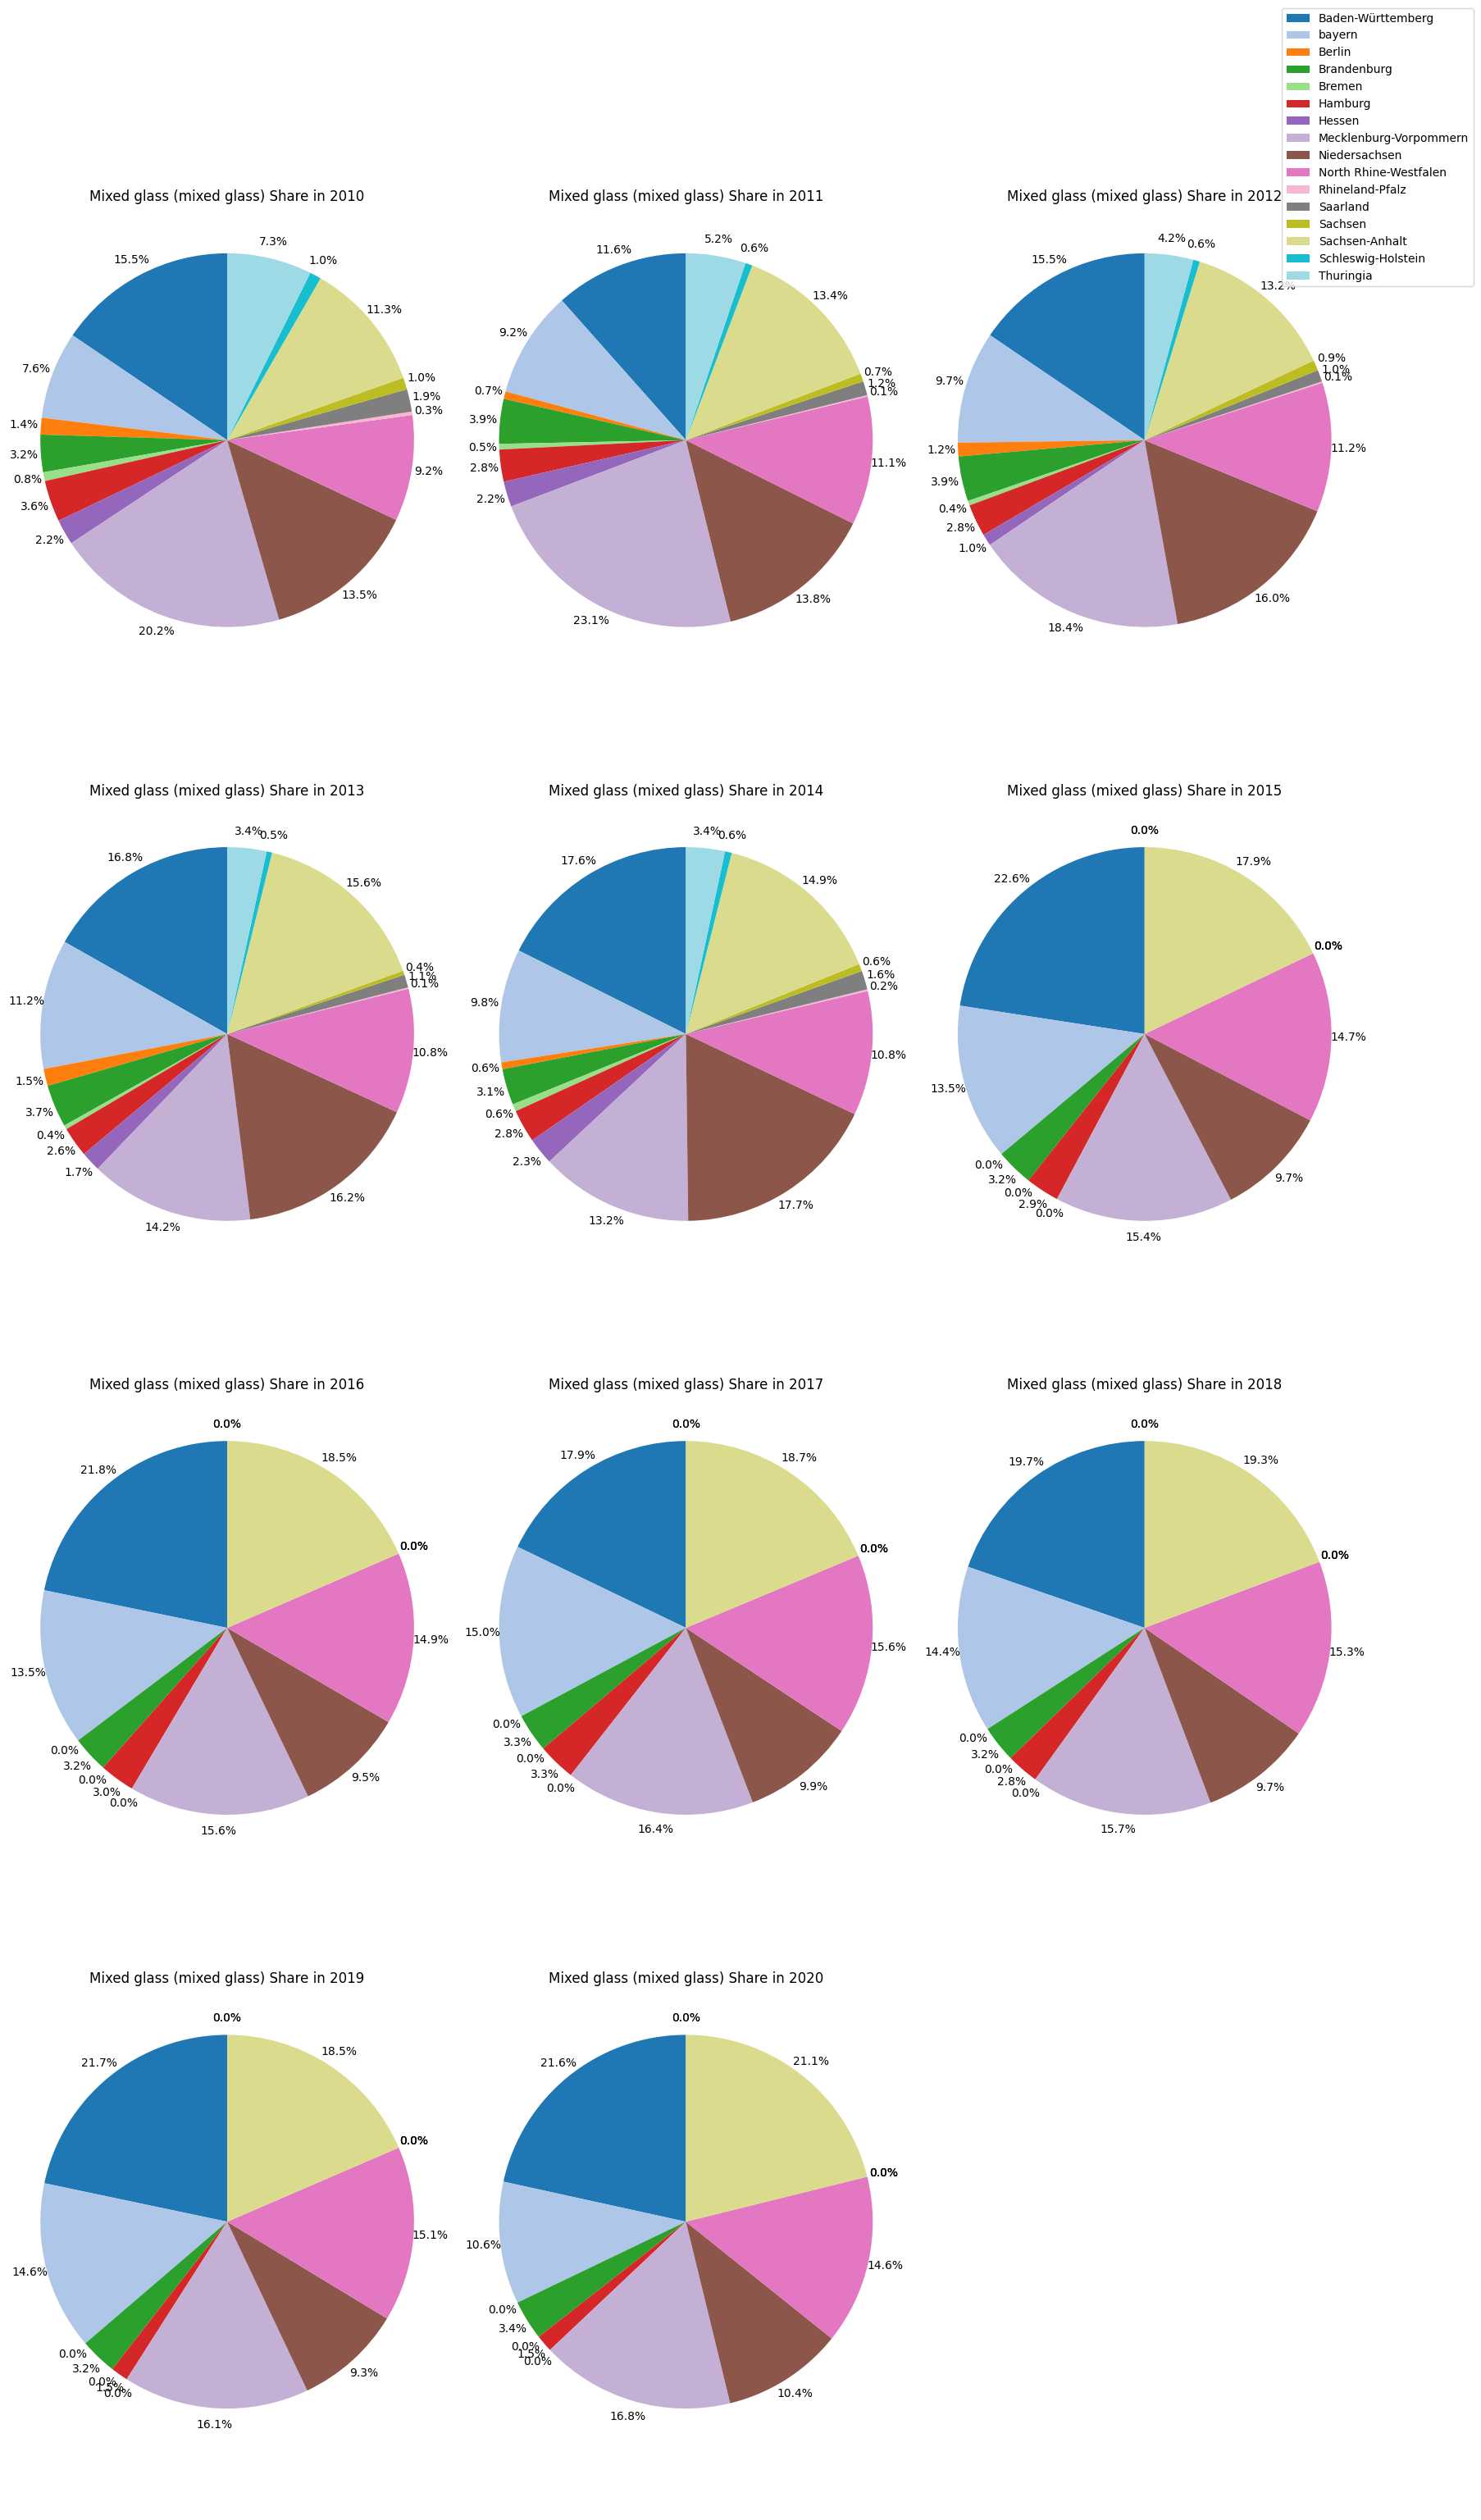

In [ ]:
create_pie_chart(data,'Mixed glass (mixed glass)',data['Year'].unique())
# in states like "Schlesng Holstein" and "Thuringia" percentage contribution is zero from 2015.
# from pie chart it can been seen that there is only 1 to 2 % of fluctuation which doesn't seems muuch but we have to keep in mind that originally very value has to be multiplied by 1000 so in reality difference is high.


#### **Insights:-**
1. The states Schlesng-Holstein and Thuringia percentage contribution for mixed glass is zero from 2015.

2. Sachsen-Anhalt , Baden-Wurttemberg, Mecklenburg-Vorpommern are responsible for the major chunk of Mixed glass return over the years.


### Collection of Sales Package Return in each state (Color separated glass)

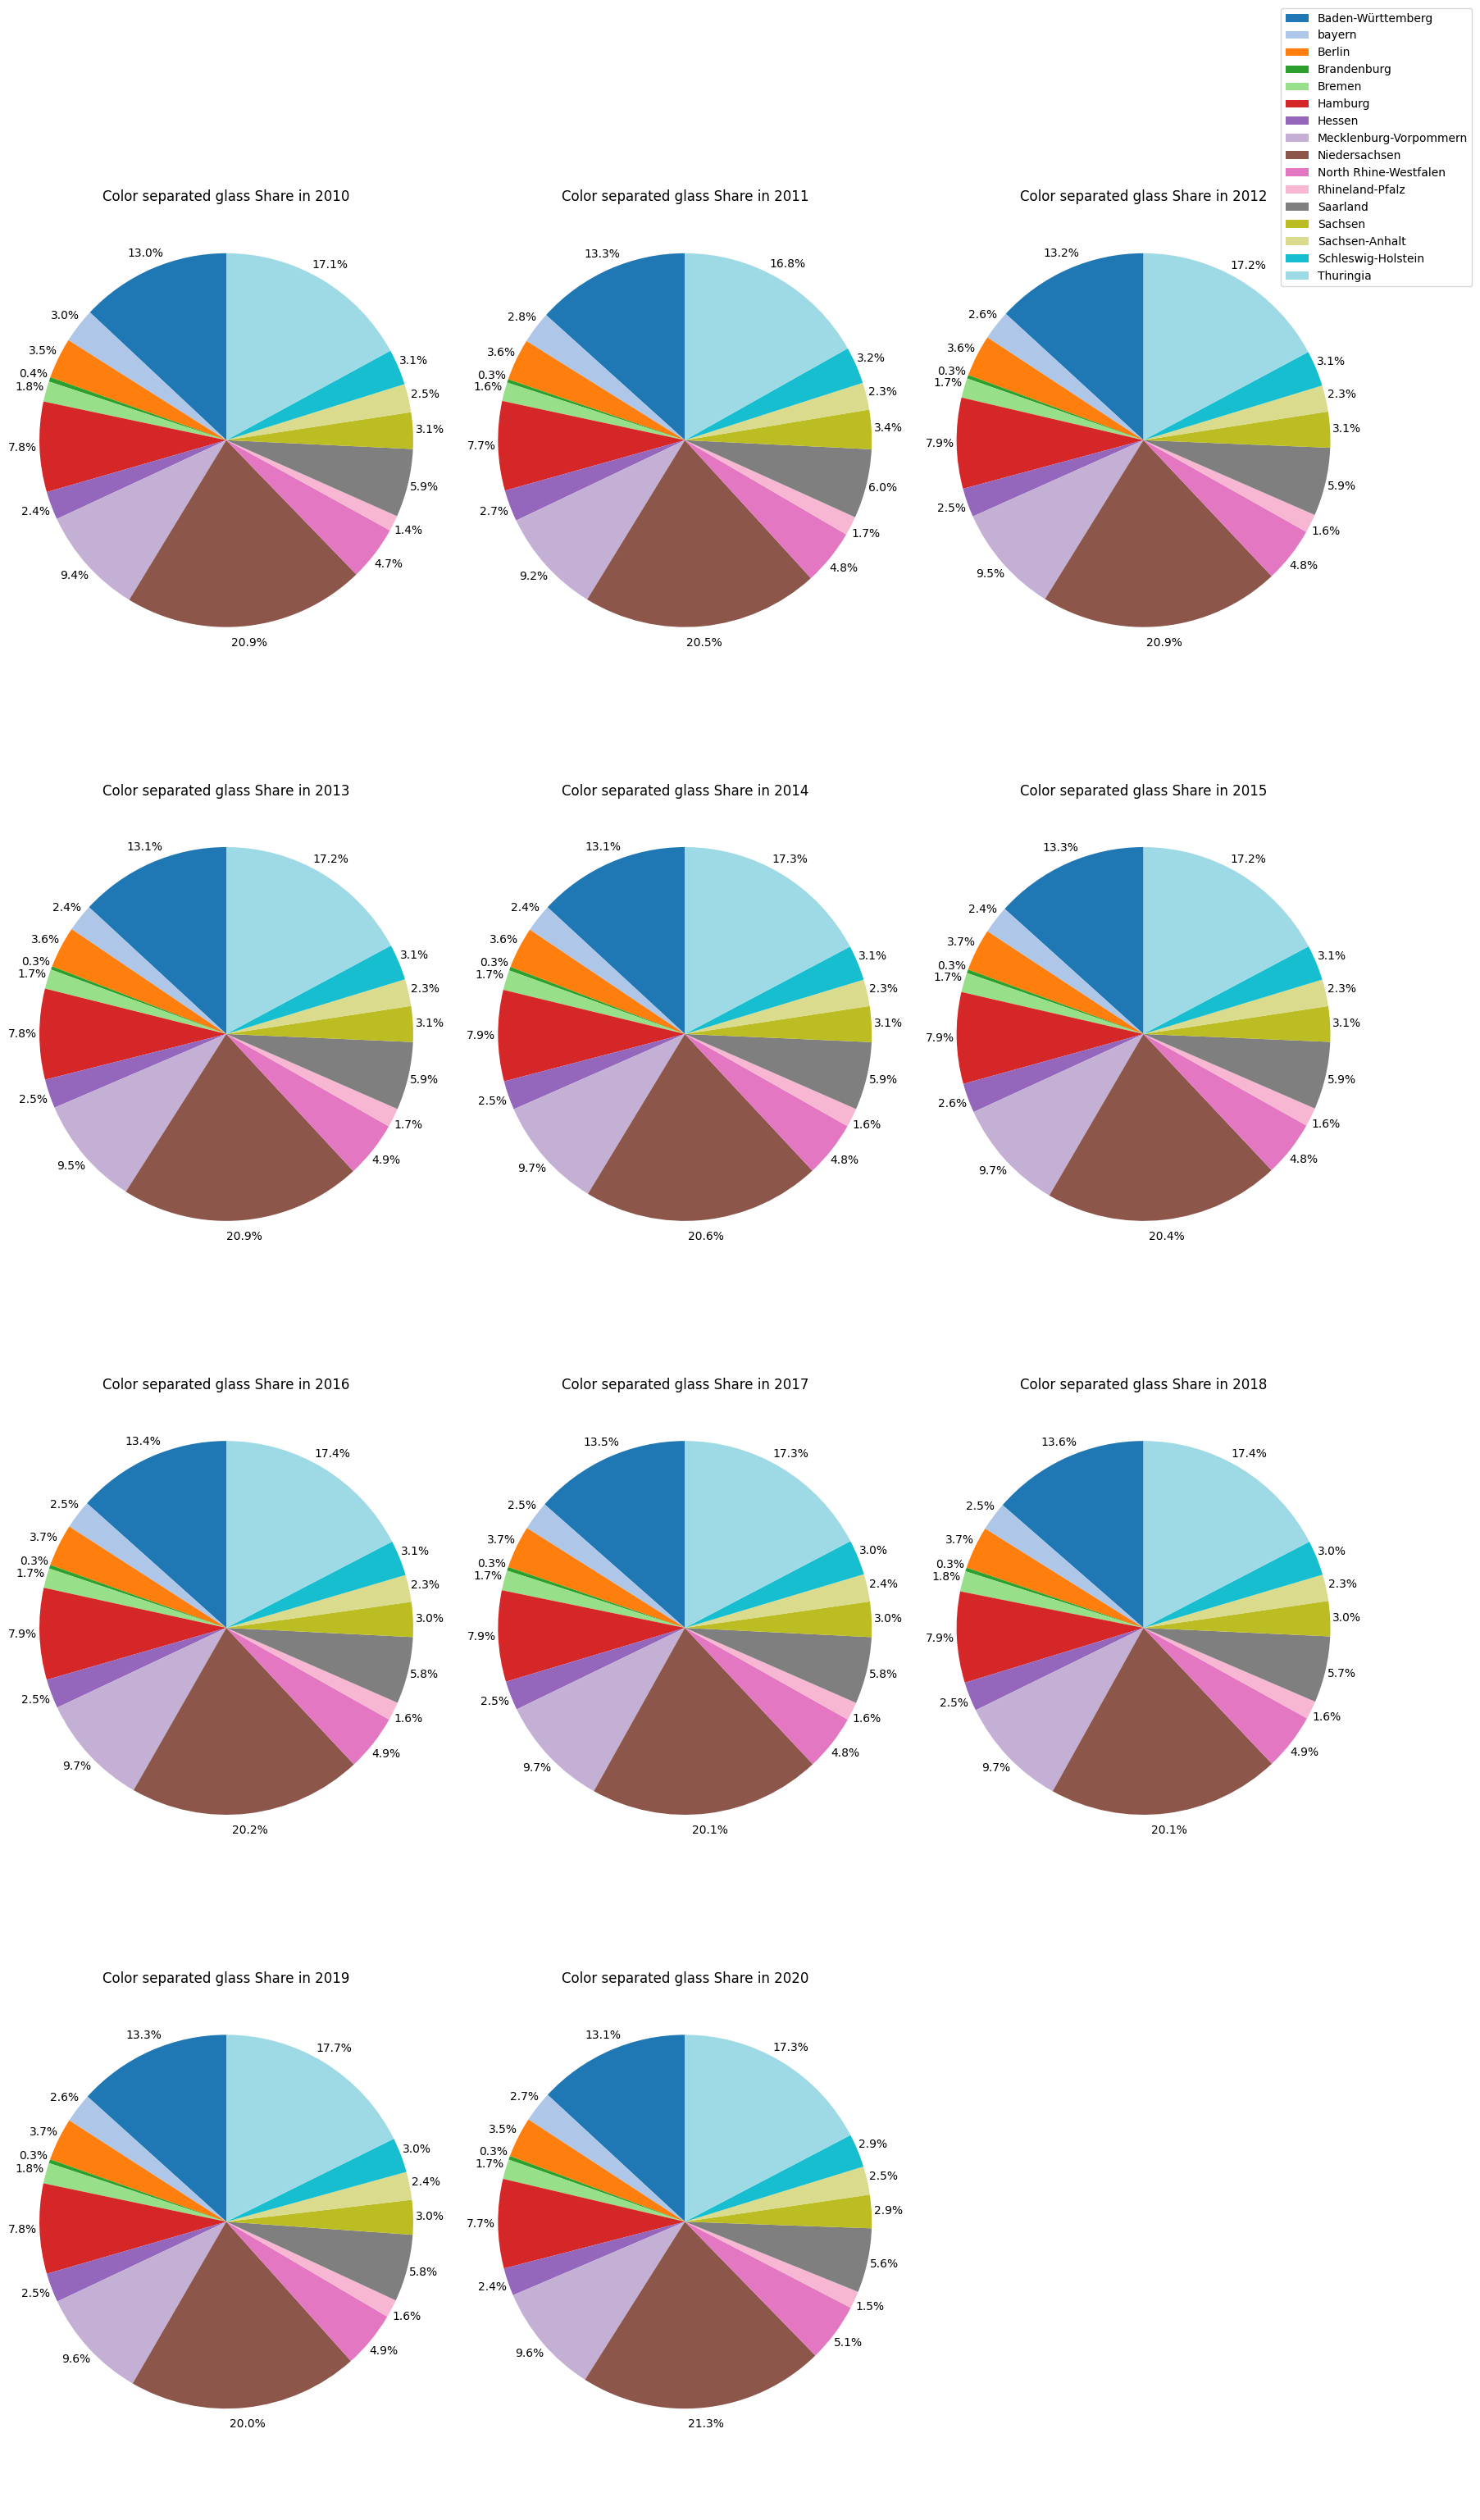

In [ ]:
create_pie_chart(data,'Color separated glass',data['Year'].unique())

#### **Insights:-**
1. Brandenburg, Bremen, Rhineland-pfalz are the states with the lowest return contribution.
2. Neidersachsen , Baden-Wurttemberg, Thuringia are responsible for the major chunk of color separated glass return over the years.

### Collection of Sales Package Return in each state (Separated Collected Plastics)

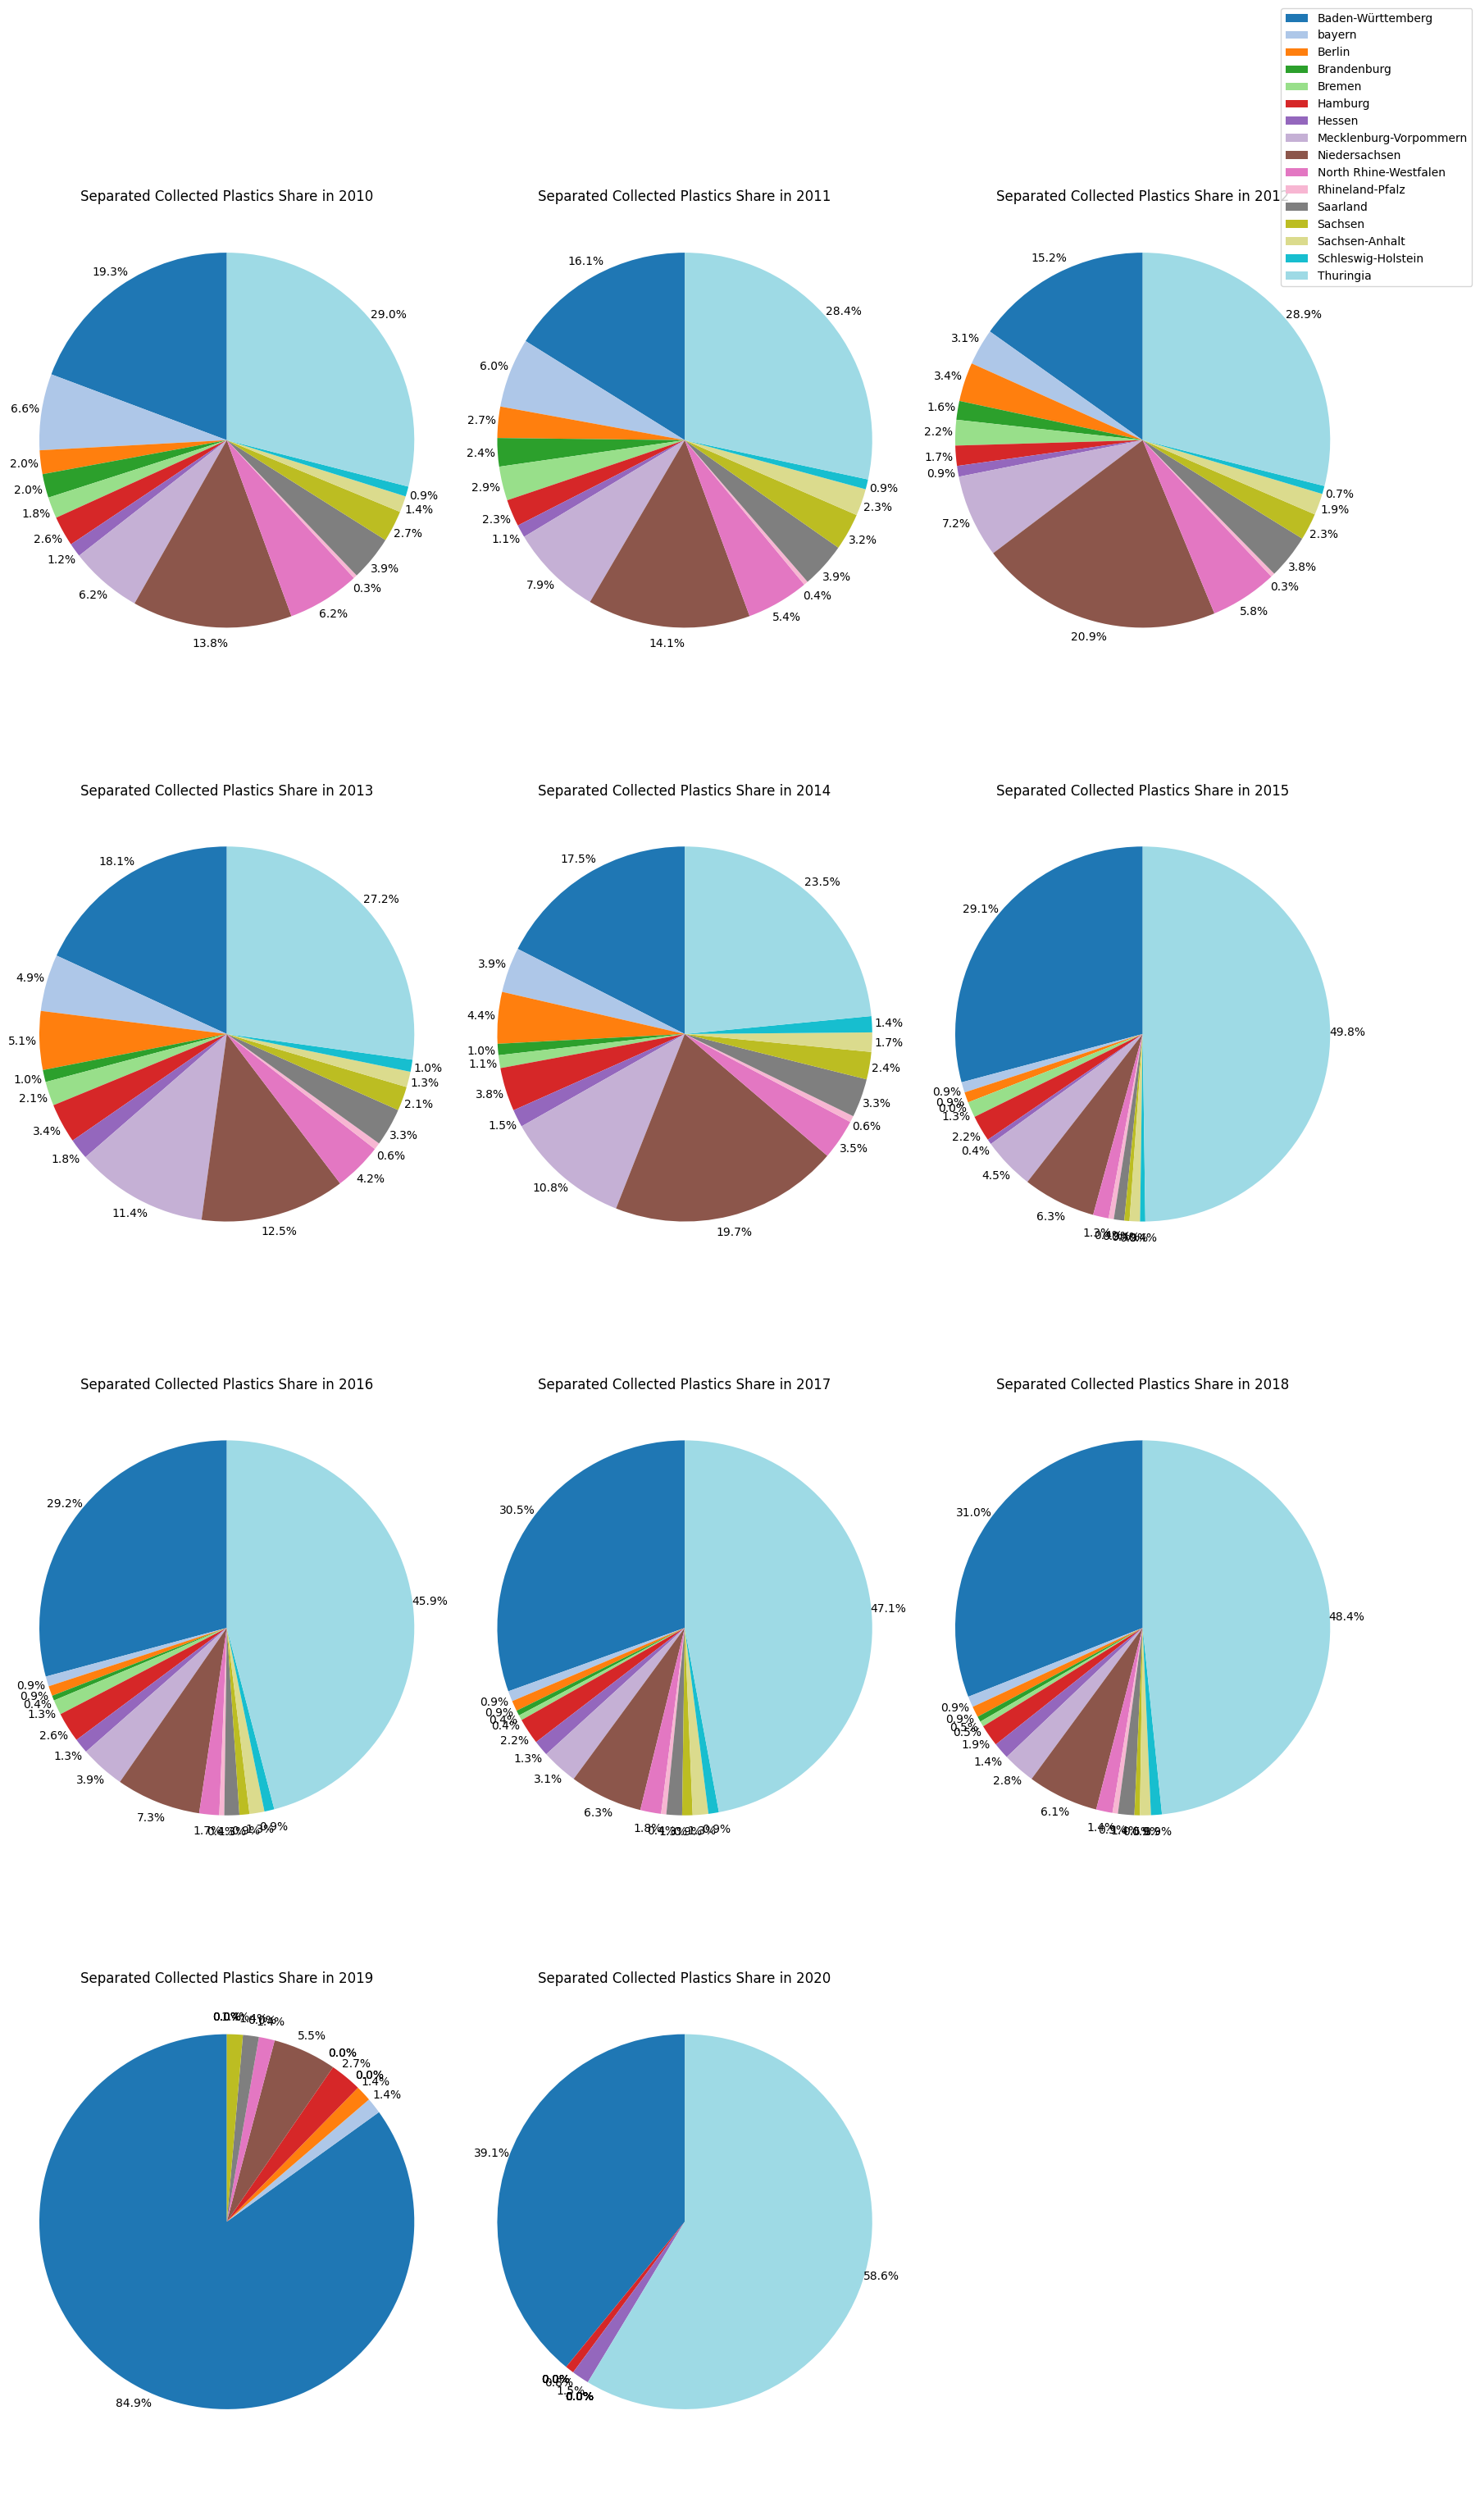

In [ ]:
create_pie_chart(data,'Separated Collected Plastics',data['Year'].unique())

#### **Insights:-**
1. Baden-Wurttemberg, Thuringia are responsible for the major chunk of separately collected plastic return over the years.

2. This data may contain error because of the drastic change of plastic return share of states over the year.

3. The values of each state's share can be wrong and some of the data can be missing.

### Collection of Sales Package Return in each state (Separated collected metals)

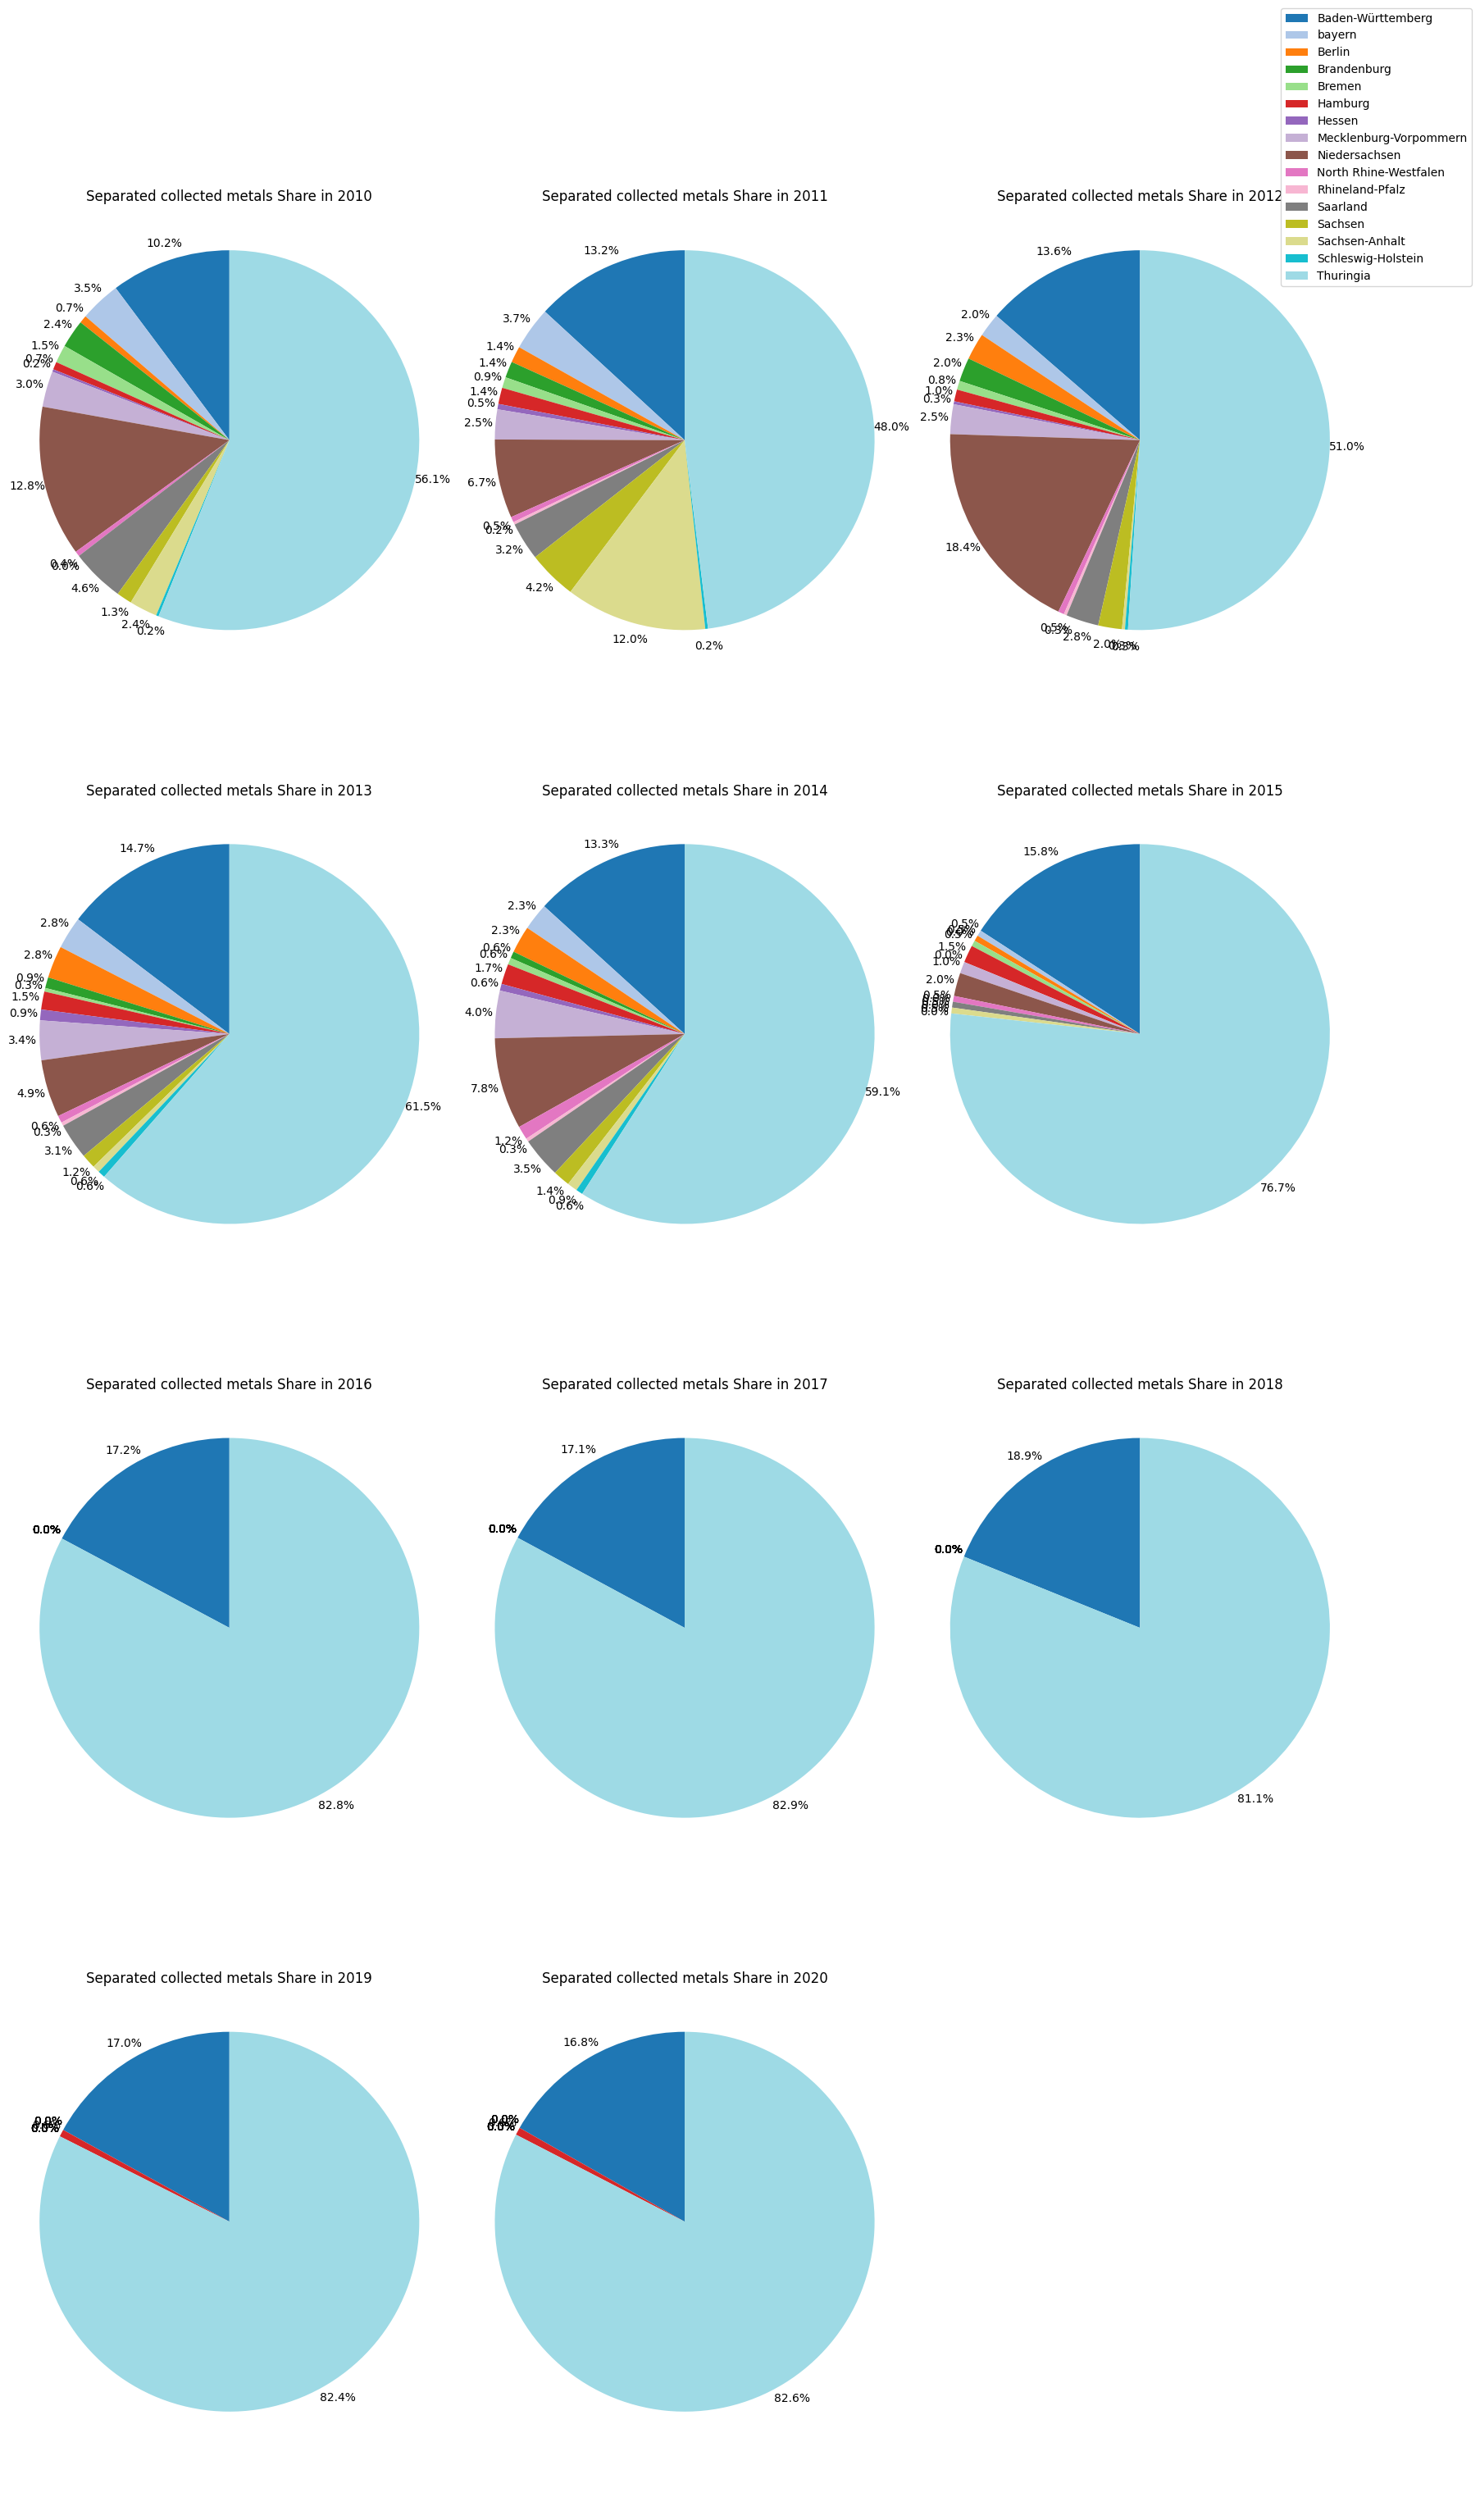

In [ ]:
create_pie_chart(data, 'Separated collected metals',data['Year'].unique())

#### **Insights:-**
1. Baden-Wurttemberg, Thuringia are responsible for the major chunk of separately collected metal return over the years.

2. This data may contain error because of the drastic change of metals return share of states over the year.

3. The values of each state's share can be wrong and some of the data can be missing.

### Collection of Sales Package Return in each state (Composites collected separately)

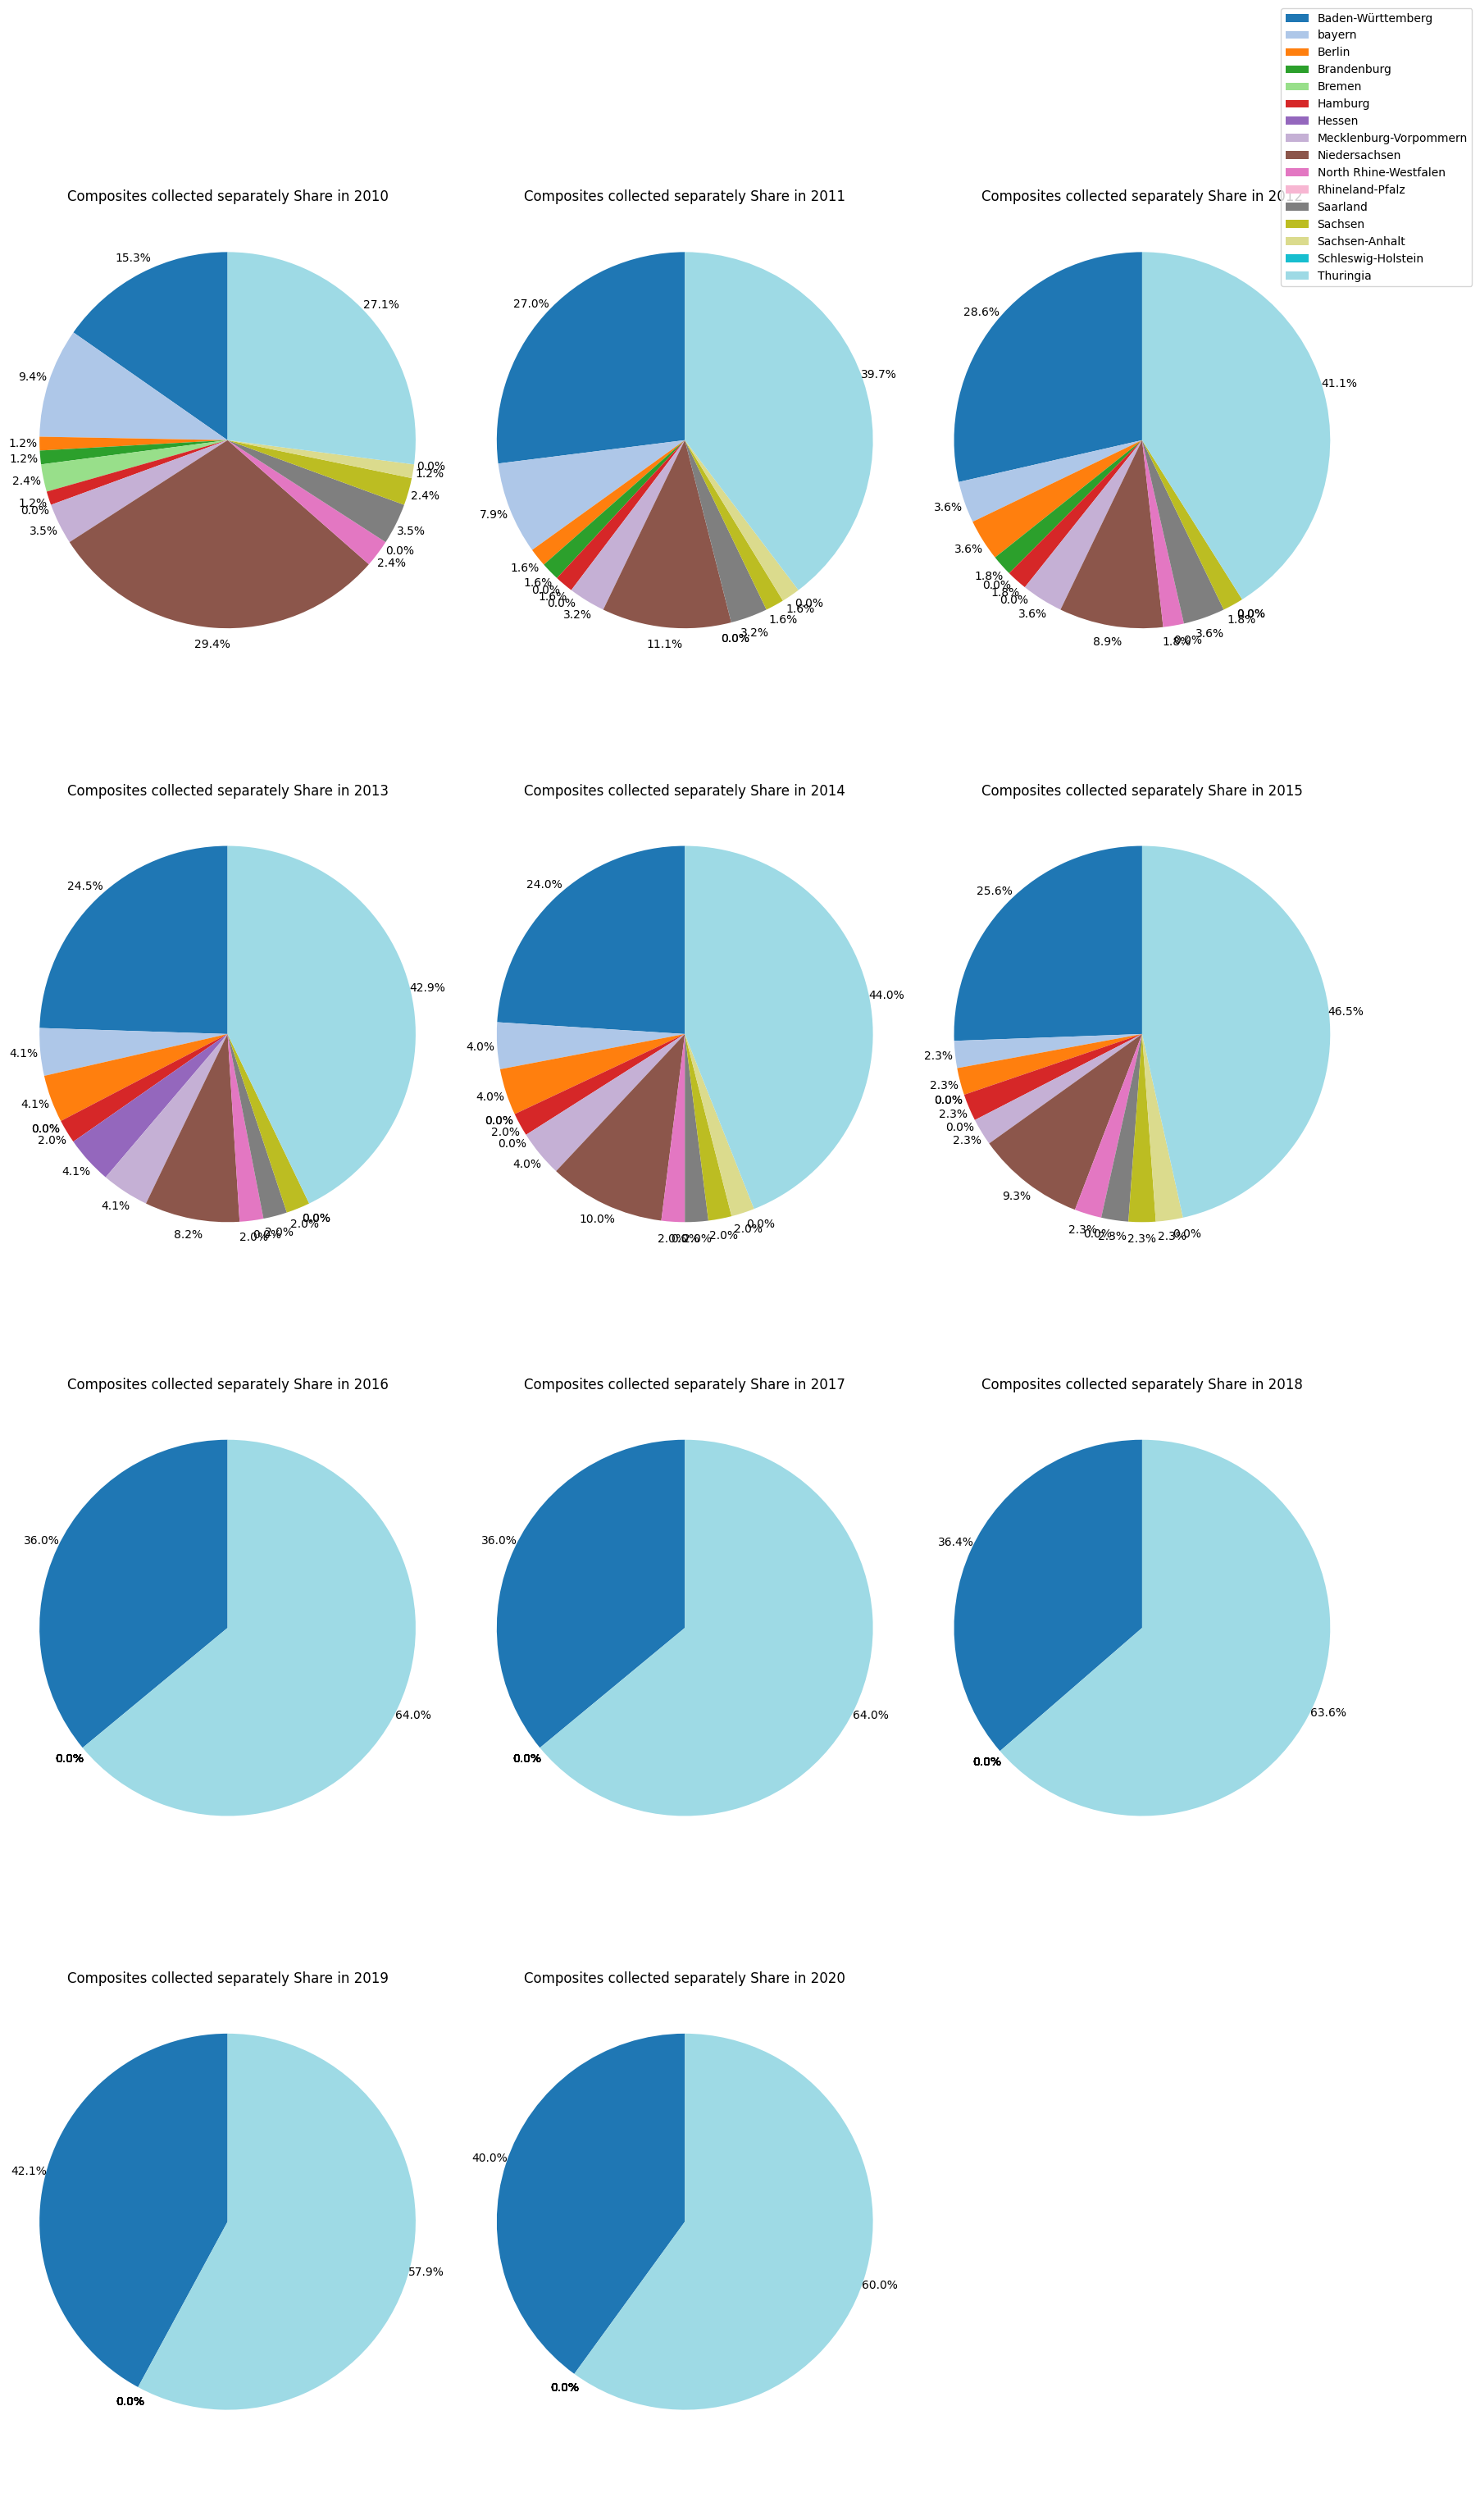

In [ ]:
create_pie_chart(data,'Composites collected separately',data['Year'].unique())

#### **Insights:-**
1. Baden-Wurttemberg, Thuringia are responsible for the major chunk of separately collected composites return over the years.

2. This data may contain error because of the drastic change of composites return share of states over the year.

3. The values of each state's share can be wrong and some of the data can be missing.

## Yearwise Return of Sales Package Return Individual

In [ ]:
yearwise_df = data.groupby(['Year']).sum().reset_index()

<ipython-input-149-96b1fa1b2df2>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearwise_df = data.groupby(['Year']).sum().reset_index()


In [ ]:
def plot_bar_chart(df,column):
  plt.figure(figsize=(15, 5))
  sns.barplot(x=df['Year'], y=df[column])
  plt.title(f'Yearwise Individual Return of {col}')
  plt.xlabel('Year')
  plt.ylabel(f'{col}')
  plt.yticks(np.arange(0,df[column].max()+200,int((df[column].max()+200)/16)))

  for index, value in enumerate(df[column]):
      plt.text(index, value,f'{value:.2f}', ha='center', va='bottom')

  plt.show()

### Yearwise Return of Sales Package Return Individual (Mixed Packaging)

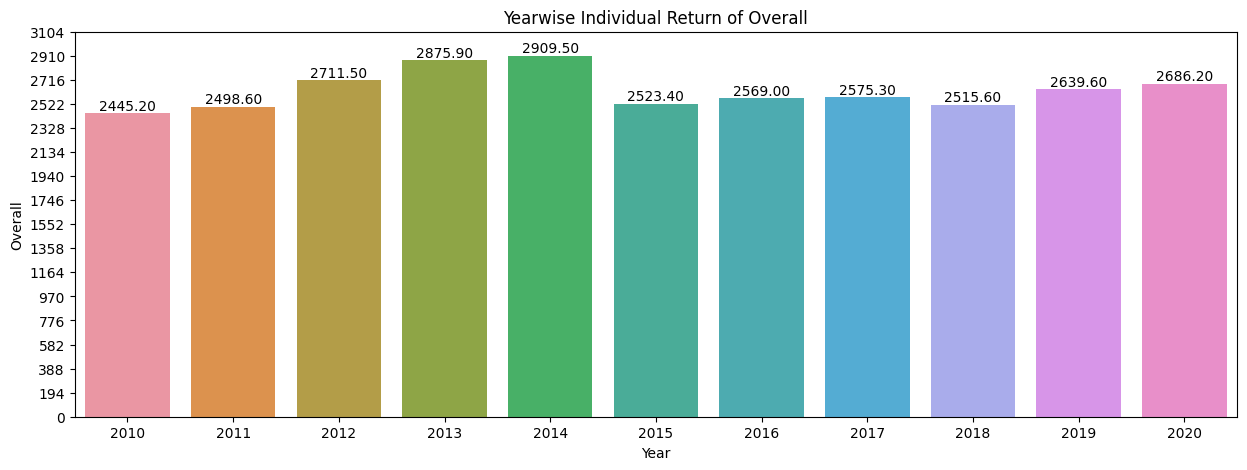

In [ ]:
plot_bar_chart(yearwise_df,'mixed packaging')

#### **Insights:-**
1. The highest overall return was in 2014. As mentioned, there was a notable drop in return collection in 2015.

2. This may either point towards some factors that contributed to drop in collection or it may also point towards some inconsistencies in the data.

3. The trend is following a uniform crest and trough

### Yearwise Return of Sales Package Return Individual (Packaging made of paper, cardboard)

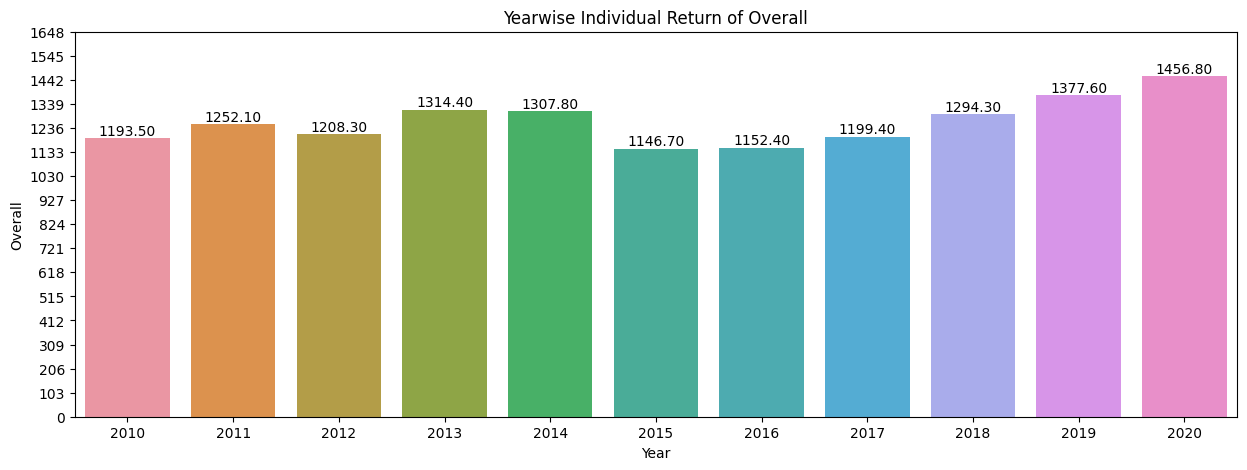

In [ ]:
plot_bar_chart(yearwise_df,'Packaging made of paper, cardboard')

#### **Insights:-**
1. The highest overall return was in 2020. As mentioned, there was a notable drop in return collection in 2015.

2. This may either point towards some factors that contributed to drop in collection or it may also point towards some inconsistencies in the data.

3. The trend is following a uniform crest and trough

4. This also reveals that return collection of Packaging made of paper, cardboard has reached the pre-drop level of 2014.

### Yearwise Return of Sales Package Return Individual (Mixed glass (mixed glass))



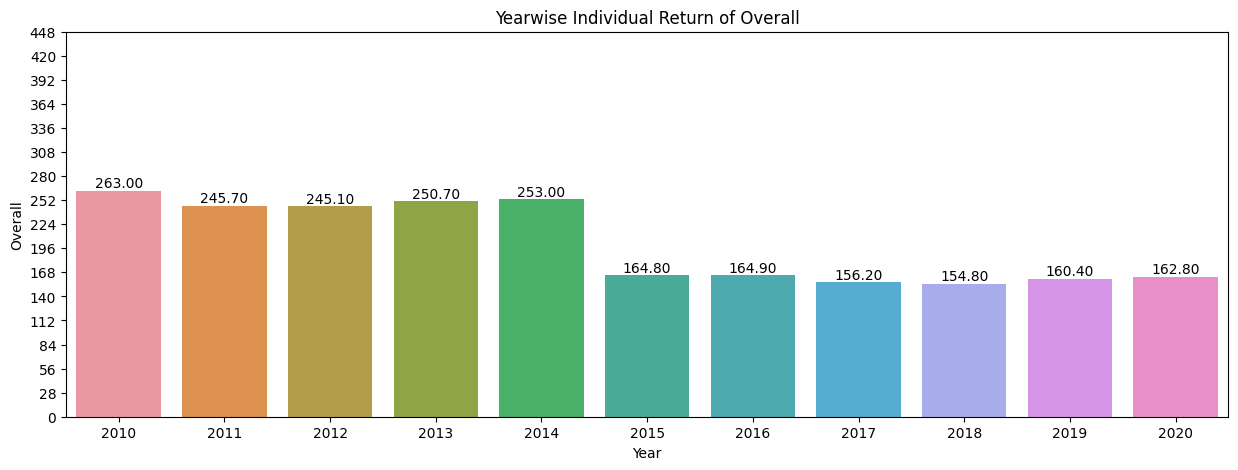

In [ ]:
plot_bar_chart(yearwise_df,'Mixed glass (mixed glass)')

#### **Insights:-**
1. The highest overall return was in 2014. As mentioned, there was a notable drop in return collection in 2015.

2. This may either point towards some factors that contributed to drop in collection or it may also point towards some inconsistencies in the data.

3. There is decrease in value after 2014, then it is always constant.

4. We can say that mixed glass is not preferred and separately collected glass is preferred.

### Yearwise Return of Sales Package Return Individual (Color separated glass)



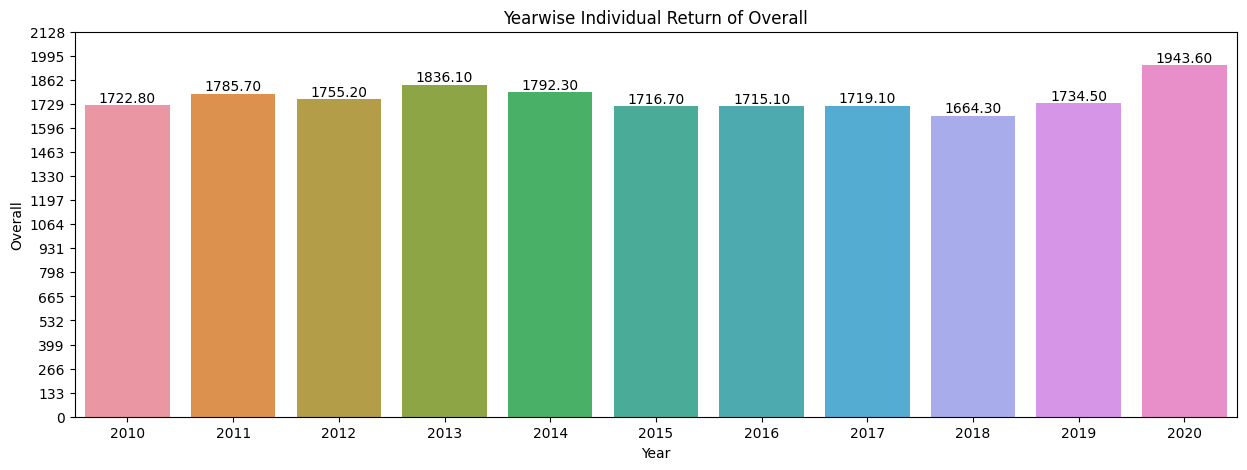

In [ ]:
plot_bar_chart(yearwise_df,'Color separated glass')

#### **Insights:-**
1. The highest overall return was in 2020.

2. As mentioned, there was a drop in return collection in 2015 but not that significant.

3. As said, separately collected glass is more preferred.

### Yearwise Return of Sales Package Return Individual (Separated Collected Plastics)



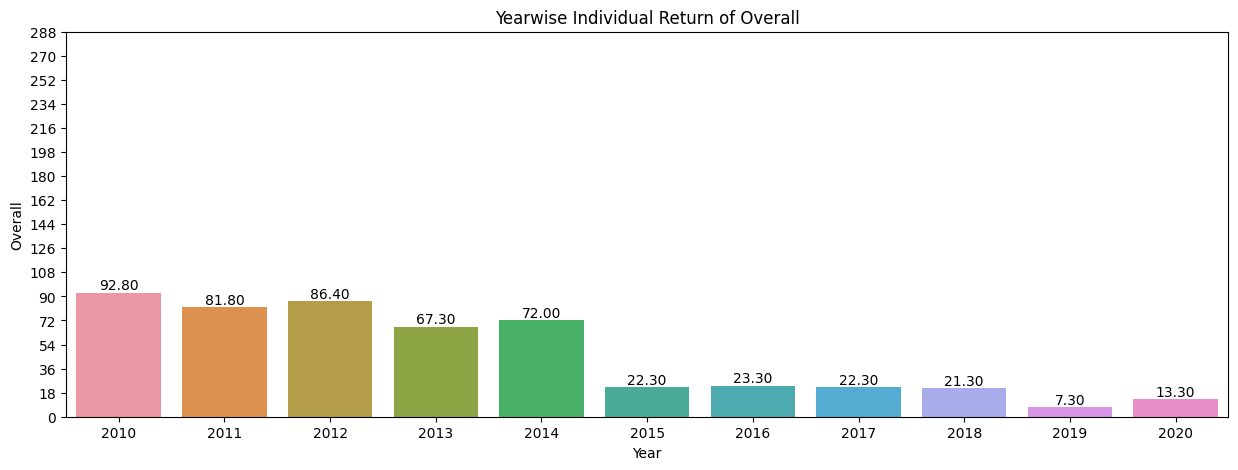

In [ ]:
plot_bar_chart(yearwise_df,'Separated Collected Plastics')

#### **Insights:-**
1. The collection is not much for separately collected plastic.

2. From "32136-0003" dataset, We see that Return through Industry solutions and by system operators is also less.

3. As mentioned, separately collected glass is more preferred.

### Yearwise Return of Sales Package Return Individual (Separated collected metals)



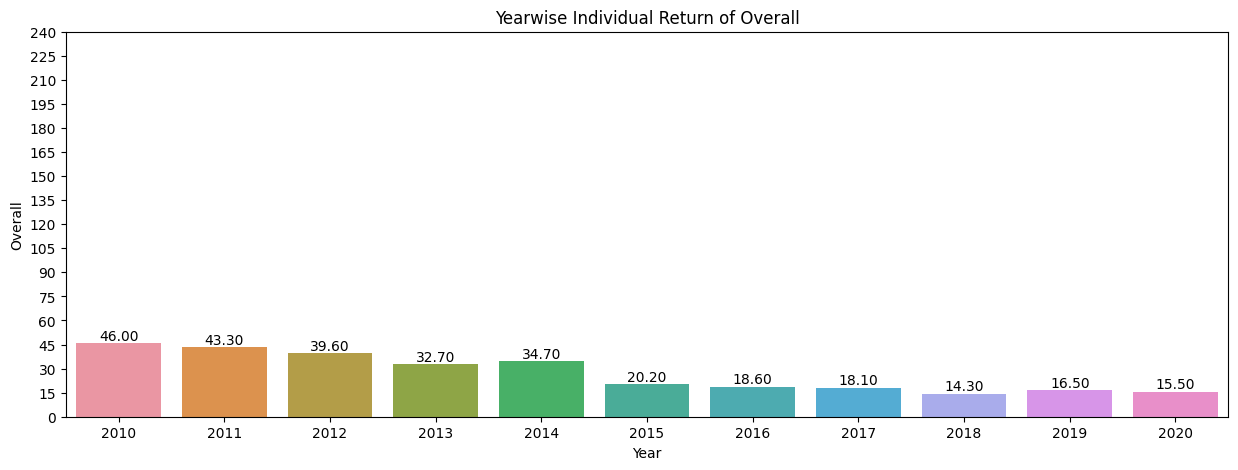

In [ ]:
plot_bar_chart(yearwise_df,'Separated collected metals')

#### **Insights:-**
1. Metals are not easily discarded by people so this may explain the low returns of separately collected metals.

### Yearwise Return of Sales Package Return Individual (Composites collected separately)



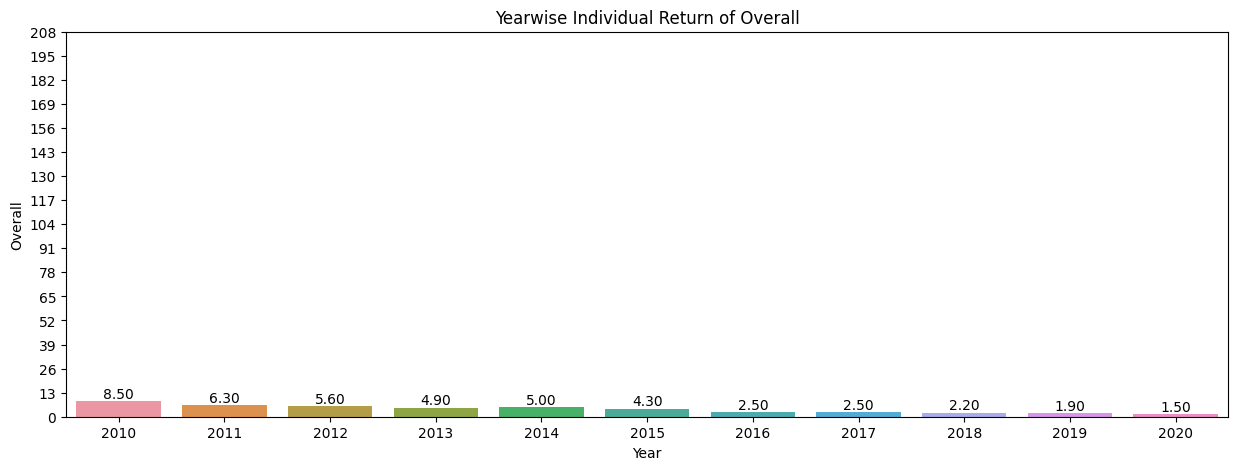

In [ ]:
plot_bar_chart(yearwise_df,'Composites collected separately')

#### **Insights:-**
1. The collection is very less since 2010, and in the year 2020, it is almost negligible.

## Distribution of Data in a Column

In [ ]:
def plot_histogram(dataframe, column_name):

    # Plot the histogram
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.hist(dataframe[column_name], bins=50, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

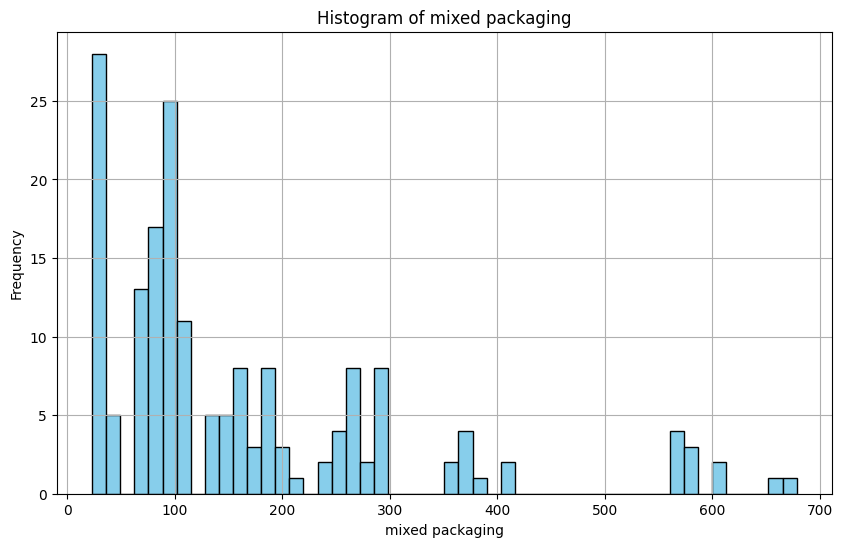

In [ ]:
plot_histogram(data,'mixed packaging')

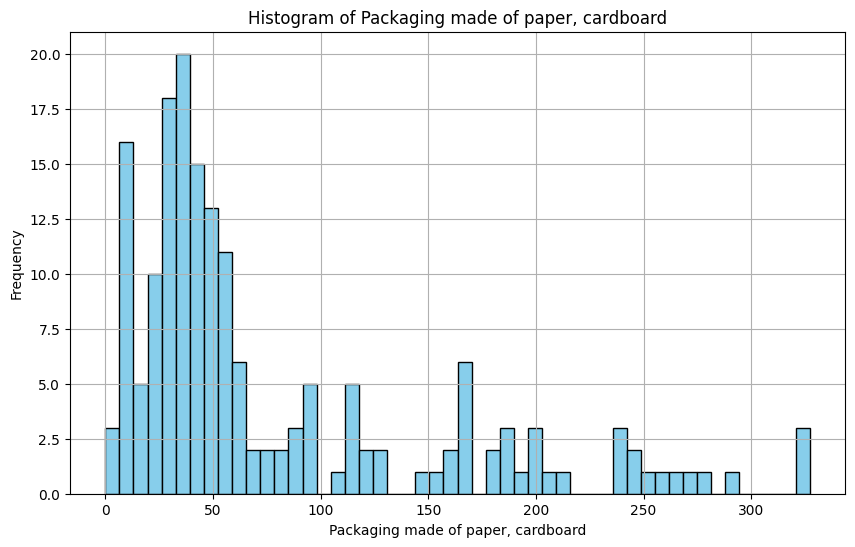

In [ ]:
plot_histogram(data,'Packaging made of paper, cardboard')

#### **Insights:-**
1. Skewed Data
2. We can see that very huge tonnage of paper/cardboard are not discarded at a time but small amount is collected.

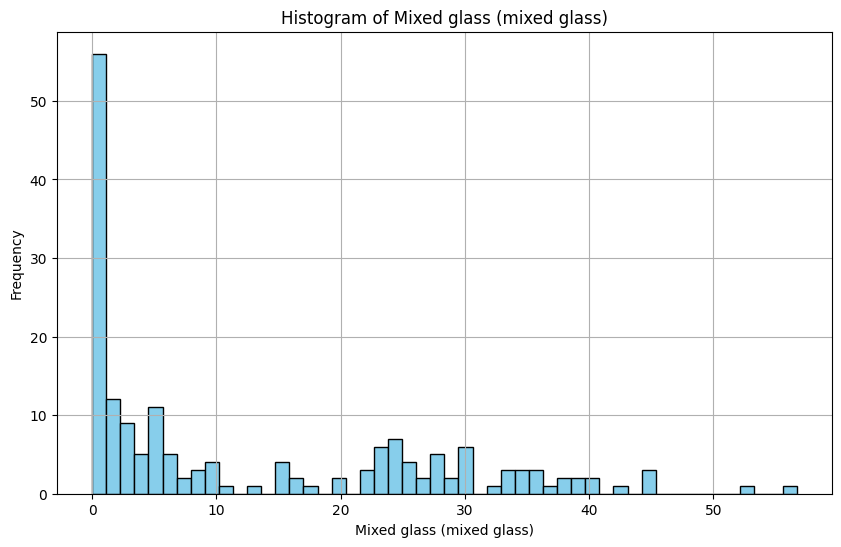

In [ ]:
plot_histogram(data,'Mixed glass (mixed glass)')

#### **Insights:-**
1. Mixed Glass is discarded very few times as there is very less tonnage frequency.

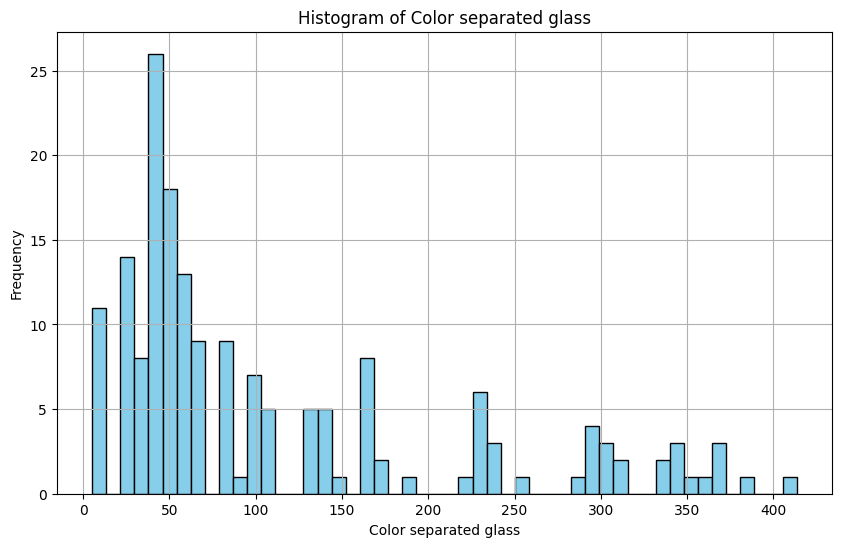

In [ ]:
plot_histogram(data,'Color separated glass')

#### **Insights:-**
1. The data is skewed.
2. Since the tonnage is small, small vehicle collection should be preferred.

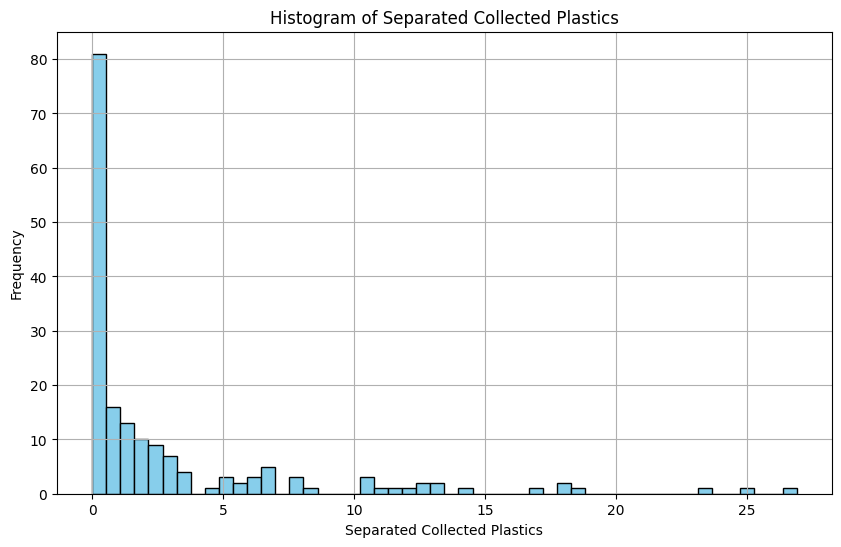

In [ ]:
plot_histogram(data,'Separated Collected Plastics')

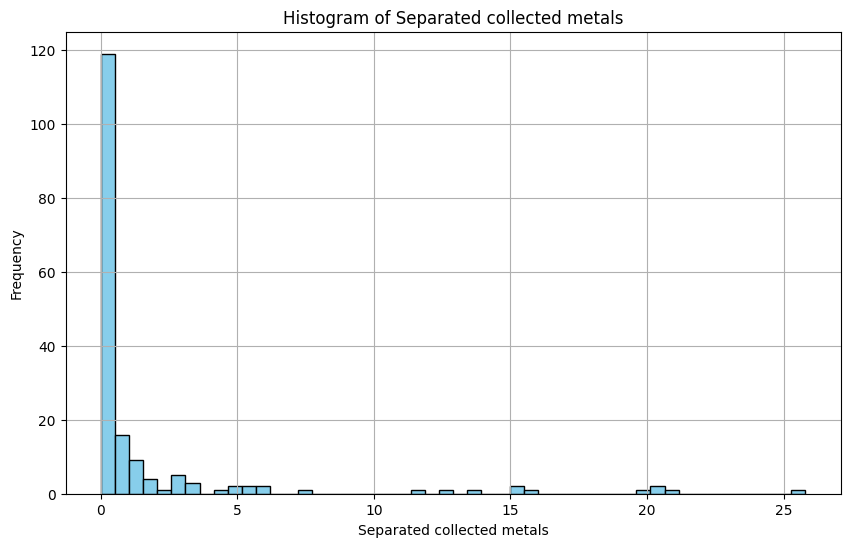

In [ ]:
plot_histogram(data,'Separated collected metals')

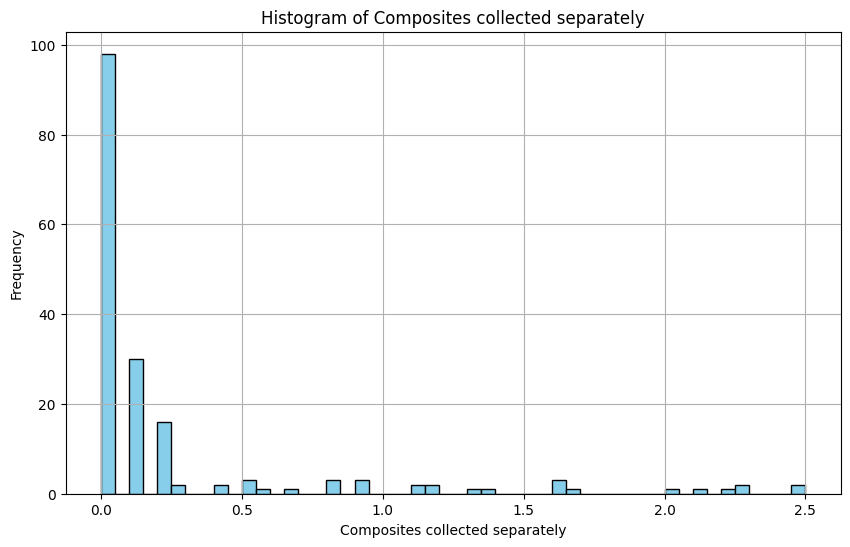

In [ ]:
plot_histogram(data,'Composites collected separately')

## Correlation Between Columns

In [ ]:
corr_df=data.drop(['Year','State'],axis=1)
data_corr=corr_df.corr()

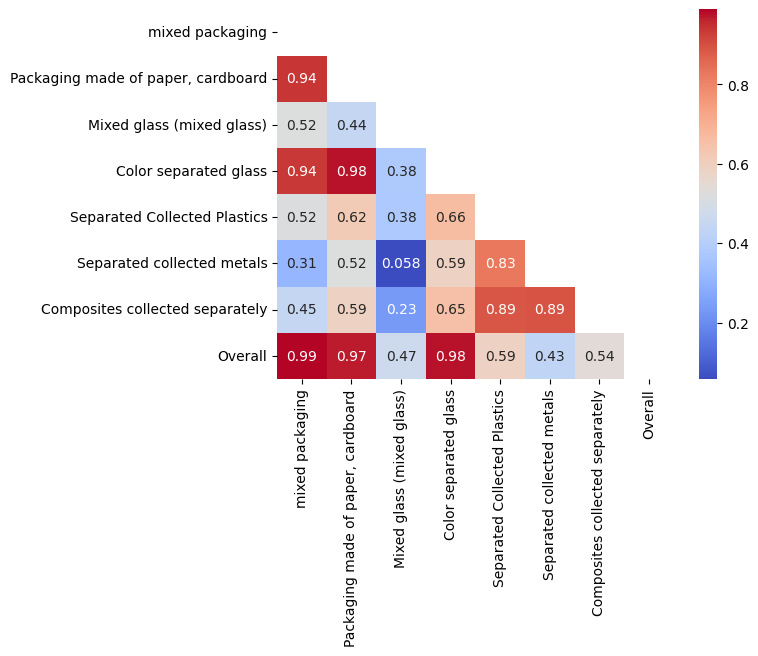

In [ ]:
mask = np.triu(np.ones_like(data_corr, dtype=bool))
sns.heatmap(data_corr,annot=True,cmap='coolwarm',mask=mask);

#### **Insights:-**
1. We can say that mixed packaging majorly constitutes of paper/cardboard return, color seperated glass return.

2. Except above insight, We don't think this correlation matrix contains any meaning because every type of waste is different from each other.

## Data Distribution Summarization for each Sales Package Return Column

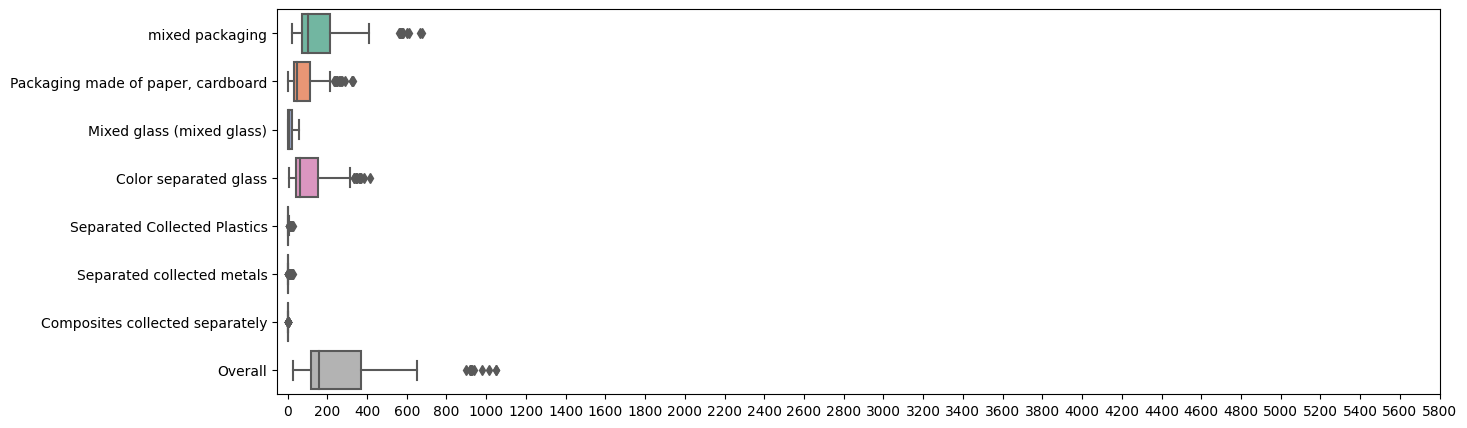

In [ ]:
## Boxplot for the Data
plt.figure(figsize=(15,5))
sns.boxplot(data=data.drop(['Year'],axis=1),orient='h',palette='Set2')
plt.xticks(np.arange(0,6000,200));